In [9]:
#PPG classification using CNN
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from pylab import rcParams
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import changefinder
import seaborn as sns
from tsfresh import extract_features, extract_relevant_features
from tsfresh.feature_selection.selection import select_features
from tsfresh.utilities.dataframe_functions import impute
import glob
from keras.models import Sequential,load_model
from keras.layers import Dense, Activation,LSTM
from keras.optimizers import Adam
from keras.utils import np_utils , plot_model
import keras.backend as K
from keras.callbacks import EarlyStopping,ModelCheckpoint
import h5py
import os

train_data\0_gu2rev_sampling100ms_relax7s_act3s_2byte.txt


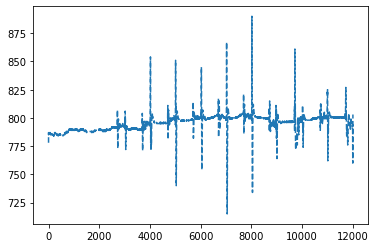

record:2711
record:3692
record:4698
record:5694
record:6694
record:7688
record:8696
record:9694
record:10702
record:11702
[[791 791 792 ... 794 794 794]
 [789 790 790 ... 795 796 797]
 [796 796 796 ... 799 798 799]
 ...
 [796 797 796 ... 787 787 786]
 [800 800 800 ... 797 797 797]
 [801 801 801 ... 778 780 782]]


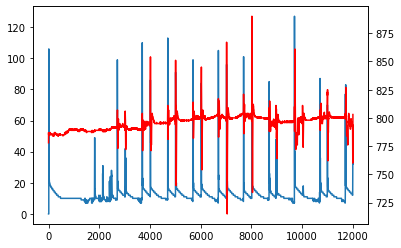

train_data\0_gu_sampling100ms_relax7s_act3s_2byte.txt


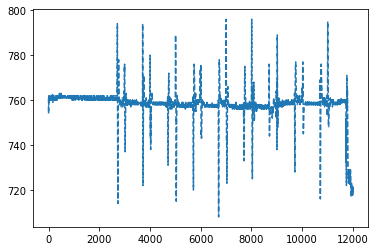

record:2702
record:3707
record:4695
record:5703
record:6692
record:7703
record:8691
record:9695
record:10699
record:11729
[[761 761 760 ... 759 759 758]
 [758 758 758 ... 759 759 759]
 [758 758 758 ... 757 757 756]
 ...
 [759 760 760 ... 759 759 760]
 [758 758 758 ... 760 759 759]
 [759 759 759 ... 728 723 728]]


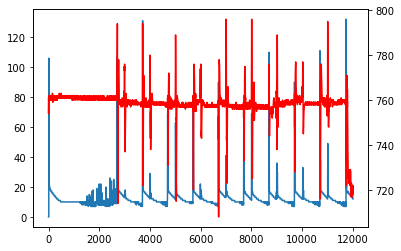

train_data\1_choki2rev_sampling100ms_relax7s_act3s_2byte.txt


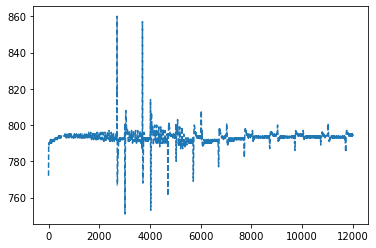

record:2692
record:3701
record:4702
record:5699
record:6691
record:7706
record:8713
record:9699
record:10725
record:11702
[[791 792 792 ... 792 792 792]
 [796 795 795 ... 793 792 793]
 [793 793 793 ... 795 795 794]
 ...
 [794 793 793 ... 795 795 795]
 [794 794 794 ... 795 795 795]
 [793 793 793 ... 795 795 795]]


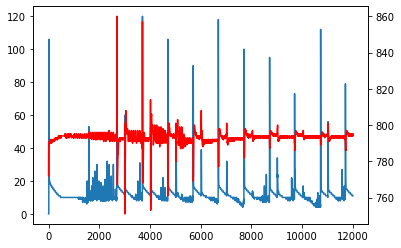

train_data\1_choki_sampling100ms_relax7s_act3s_2byte.txt


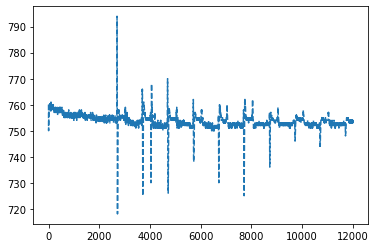

record:2697
record:3693
record:4689
record:5704
record:6694
record:7686
record:8710
record:9714
record:10701
record:11705
[[755 754 754 ... 756 756 756]
 [753 753 753 ... 757 757 757]
 [752 752 752 ... 756 756 756]
 ...
 [752 752 752 ... 754 755 754]
 [752 753 752 ... 754 754 754]
 [752 753 753 ... 754 754 754]]


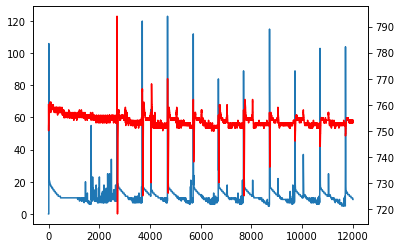

train_data\2_par2_sampling100ms_relax7s_act3s_2byte.txt


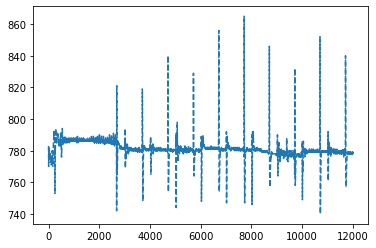

record:2684
record:3688
record:4704
record:5709
record:6705
record:7707
record:8699
record:9390
record:10697
record:11705
[[786 785 785 ... 784 784 784]
 [780 781 780 ... 782 782 782]
 [781 780 780 ... 780 780 781]
 ...
 [778 778 778 ... 779 780 779]
 [781 781 780 ... 779 779 779]
 [779 779 779 ... 778 779 779]]


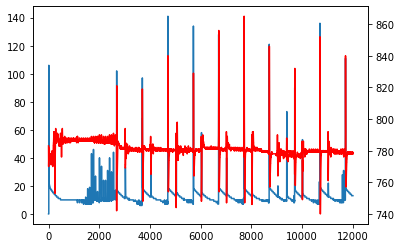

train_data\2_par_sampling100ms_relax7s_act3s_2byte.txt


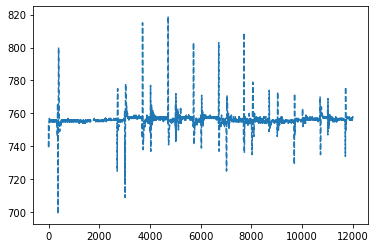

record:2707
record:3694
record:4711
record:5701
record:6701
record:7690
record:8691
record:9685
record:10704
record:11699
[[756 756 756 ... 756 756 757]
 [758 757 757 ... 755 755 756]
 [757 757 757 ... 755 756 756]
 ...
 [755 755 756 ... 756 757 756]
 [757 757 757 ... 759 759 759]
 [756 756 756 ... 757 757 757]]


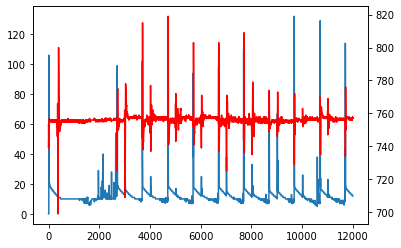

train_data\3_one2_sampling100ms_relax7s_act3s_2byte.txt


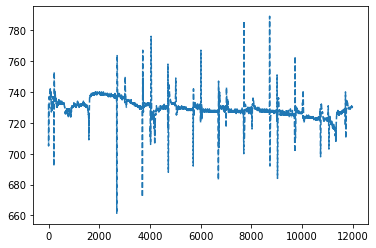

record:2687
record:3697
record:4700
record:5702
record:6692
record:7688
record:8711
record:9696
record:10703
record:11707
[[736 736 737 ... 738 738 738]
 [730 730 730 ... 733 733 733]
 [730 729 729 ... 735 736 735]
 ...
 [725 725 725 ... 728 728 728]
 [722 722 722 ... 727 727 727]
 [727 728 727 ... 730 730 730]]


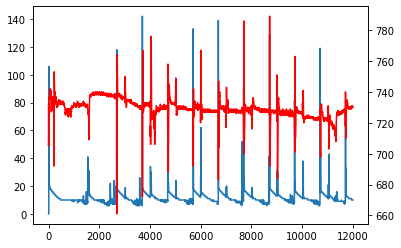

train_data\3_one3.txt


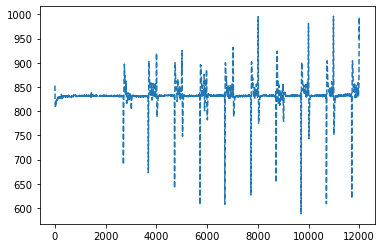

record:2696
record:3674
record:4712
record:5715
record:6694
record:7721
record:8713
record:9700
record:10699
record:11697
[[832 832 832 ... 839 839 838]
 [831 831 830 ... 838 839 839]
 [832 832 831 ... 835 834 833]
 ...
 [831 831 831 ... 842 842 841]
 [831 831 831 ... 841 841 841]
 [833 832 832 ... 843 843 842]]


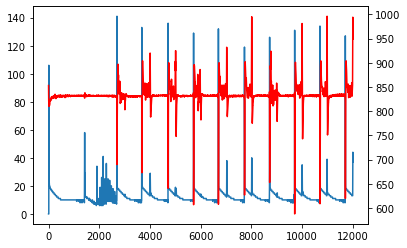

train_data\4_three2_sampling100ms_relax7s_act3s_2byte.txt


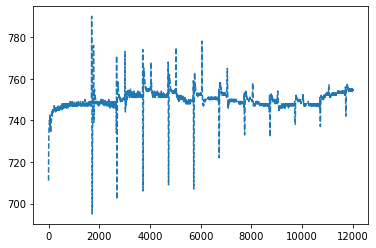

record:2674
record:3709
record:4712
record:5708
record:6705
record:7709
record:8701
record:9712
record:10695
record:11704
[[749 749 749 ... 752 752 752]
 [752 752 752 ... 757 757 757]
 [752 752 752 ... 755 755 755]
 ...
 [747 747 747 ... 750 750 750]
 [748 748 747 ... 751 750 750]
 [753 753 753 ... 755 755 755]]


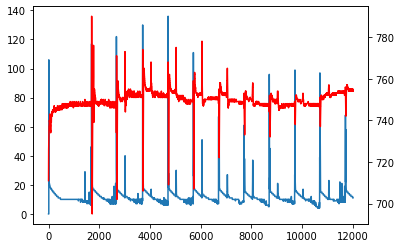

train_data\4_three_sampling100ms_relax7s_act3s_2byte.txt


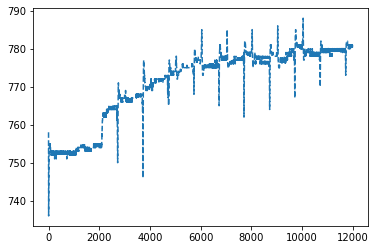

record:3701
record:4694
record:5649
record:6713
record:7702
record:8712
record:9703
record:10702
record:11709
[[768 768 768 ... 771 771 771]
 [772 772 772 ... 775 775 775]
 [775 775 775 ... 776 777 778]
 ...
 [779 779 779 ... 781 781 781]
 [778 778 778 ... 779 779 779]
 [780 780 780 ... 781 781 781]]


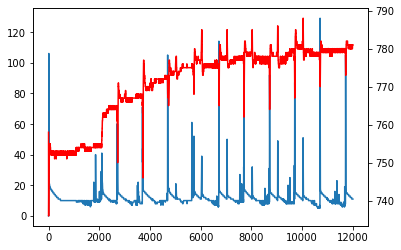

train_data\5_four2_sampling100ms_relax7s_act3s_2byte.txt


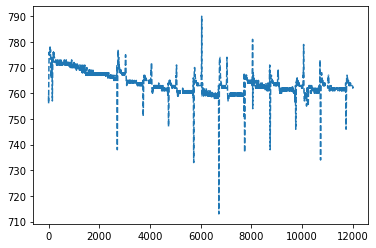

record:2694
record:3725
record:4701
record:5703
record:6703
record:7706
record:8712
record:10698
record:11724
[[766 766 766 ... 770 770 770]
 [763 764 763 ... 765 765 765]
 [762 762 761 ... 764 764 764]
 ...
 [761 761 761 ... 766 765 765]
 [761 761 761 ... 765 765 765]
 [762 762 762 ... 764 765 764]]


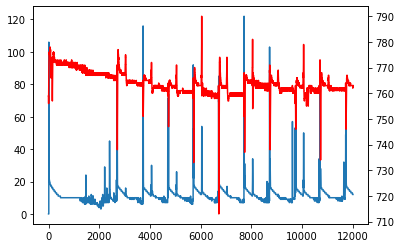

train_data\5_four_sampling100ms_relax7s_act3s_2byte.txt


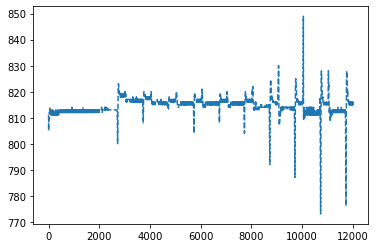

record:2702
record:3717
record:4706
record:5718
record:6724
record:7708
record:8706
record:9697
record:10703
record:11708
[[813 813 813 ... 819 819 819]
 [817 817 817 ... 818 818 818]
 [816 816 816 ... 817 817 817]
 ...
 [814 814 814 ... 817 817 817]
 [811 811 811 ... 817 818 817]
 [812 813 812 ... 817 817 817]]


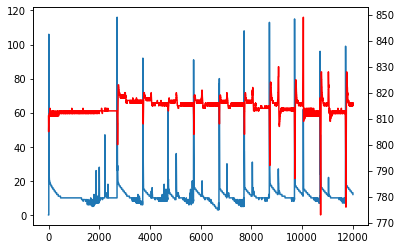

train_data\6_fox2_sampling100ms_relax7s_act3s_2byte.txt


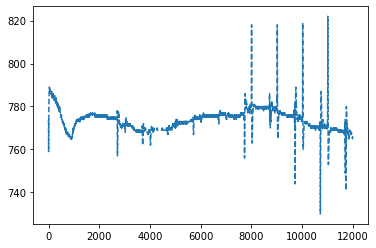

record:2705
record:3706
record:6697
record:7726
record:8710
record:9687
record:10714
record:11697
[[775 774 775 ... 772 772 772]
 [768 768 768 ... 769 769 770]
 [776 776 776 ... 777 777 777]
 ...
 [775 775 775 ... 777 777 776]
 [770 770 770 ... 773 773 773]
 [768 768 768 ... 768 768 768]]


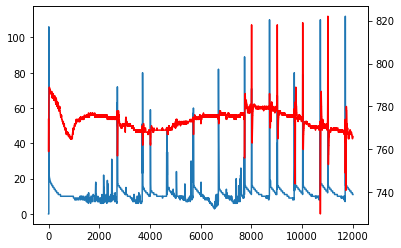

train_data\6_fox_sampling100ms_relax7s_act3s_2byte.txt


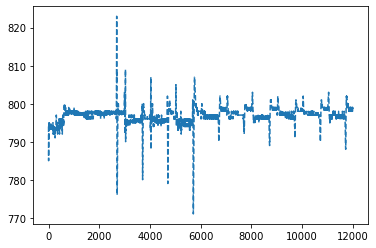

record:2679
record:4034
record:4681
record:5680
record:6711
record:8698
record:9699
record:10700
[[797 797 797 ... 798 798 798]
 [796 796 796 ... 794 794 794]
 [796 795 795 ... 800 800 800]
 ...
 [796 796 796 ... 799 799 799]
 [797 797 797 ... 799 799 799]
 [797 797 797 ... 799 799 799]]


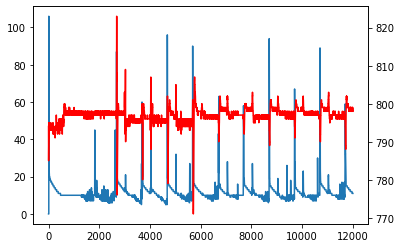

train_data\7_phone2rev_sampling100ms_relax7s_act3s_2byte.txt


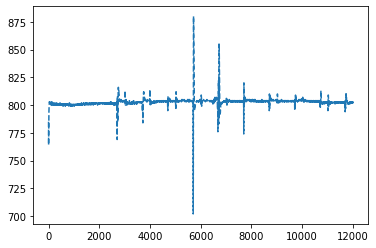

record:2700
record:3700
record:4697
record:5697
record:6661
record:7693
record:8698
record:9703
record:10699
record:11689
[[801 802 801 ... 805 804 805]
 [803 803 803 ... 805 805 804]
 [803 803 803 ... 804 804 804]
 ...
 [804 804 804 ... 804 804 804]
 [804 803 804 ... 801 802 801]
 [803 802 802 ... 802 802 802]]


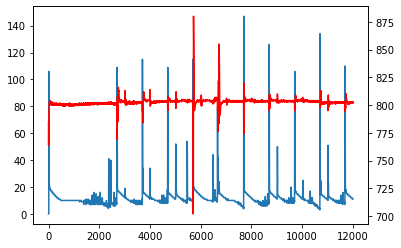

train_data\7_phone_sampling100ms_relax7s_act3s_2byte.txt


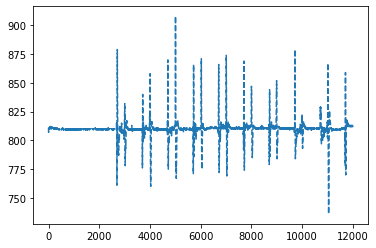

record:3697
record:4688
record:5704
record:6699
record:7686
record:8697
record:9708
record:10712
record:11687
[[810 809 809 ... 805 806 806]
 [810 809 810 ... 808 808 808]
 [810 810 810 ... 811 811 810]
 ...
 [811 811 810 ... 807 806 806]
 [811 811 811 ... 803 803 804]
 [810 810 810 ... 814 813 814]]


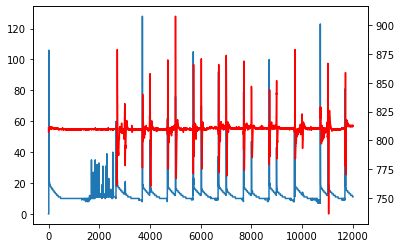

train_data\8_good2rev_sampling100ms_relax7s_act3s_2byte.txt


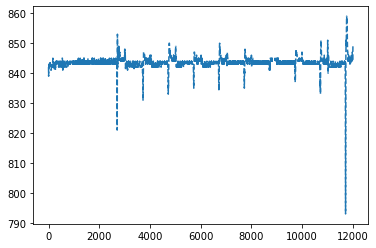

record:2699
record:3723
record:4712
record:5714
record:6707
record:7711
record:8703
record:9715
record:10702
record:11701
[[843 843 843 ... 844 844 845]
 [842 842 842 ... 844 844 844]
 [843 843 843 ... 845 845 845]
 ...
 [844 844 844 ... 845 844 845]
 [844 844 844 ... 845 845 845]
 [843 843 843 ... 847 846 846]]


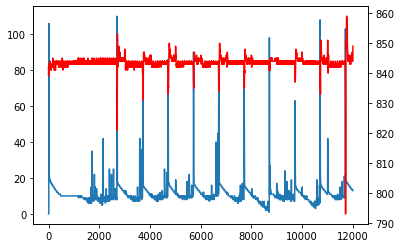

train_data\8_good3.txt


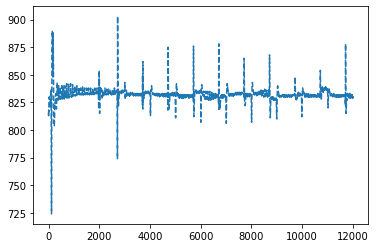

record:2713
record:3698
record:4701
record:5709
record:6708
record:7703
record:8709
record:9711
record:10711
record:11700
[[834 834 833 ... 834 834 834]
 [832 832 832 ... 834 834 834]
 [831 831 831 ... 832 833 832]
 ...
 [832 832 832 ... 831 831 831]
 [833 832 832 ... 837 837 837]
 [831 830 831 ... 832 832 832]]


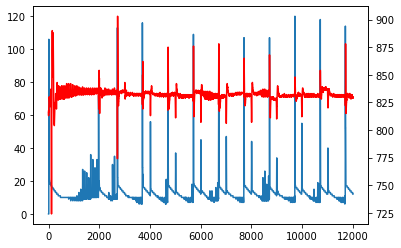

train_data\9_koyubi2_sampling100ms_relax7s_act3s_2byte.txt


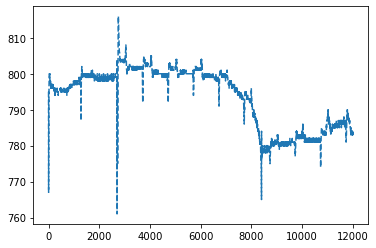

record:2695
record:3704
record:4707
record:5687
record:6714
record:9719
record:10716
record:11727
[[799 799 799 ... 806 806 806]
 [801 801 801 ... 803 803 803]
 [799 799 799 ... 802 802 802]
 ...
 [781 781 781 ... 783 783 783]
 [781 781 781 ... 784 784 784]
 [786 786 786 ... 788 788 788]]


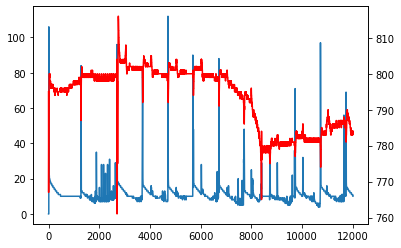

train_data\9_koyubirev_sampling100ms_relax7s_act3s_2byte.txt


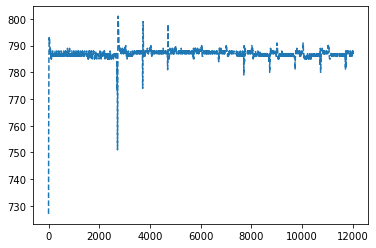

record:2699
record:3706
record:4689
record:5706
record:6699
record:7697
record:8693
record:9716
record:10702
record:11700
[[786 787 787 ... 789 788 789]
 [788 787 787 ... 788 788 787]
 [787 787 787 ... 789 789 789]
 ...
 [787 787 787 ... 788 788 787]
 [786 786 786 ... 788 788 788]
 [786 786 786 ... 787 788 788]]


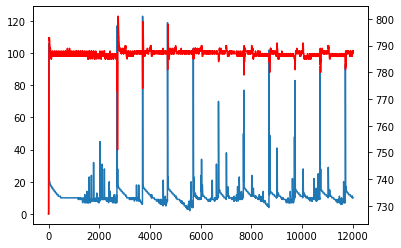

test_data\0_gu3.txt


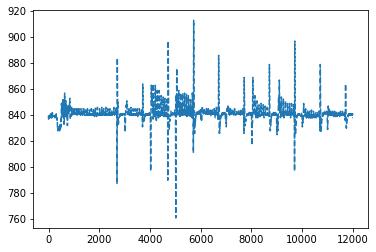

record:2700
record:3704
record:4701
record:6704
record:7703
record:8703
record:9698
record:10695
record:11706
[[841 841 842 ... 839 840 839]
 [841 842 841 ... 840 840 840]
 [842 842 841 ... 839 840 840]
 ...
 [840 840 840 ... 840 839 839]
 [840 840 840 ... 839 840 840]
 [840 839 840 ... 840 839 839]]


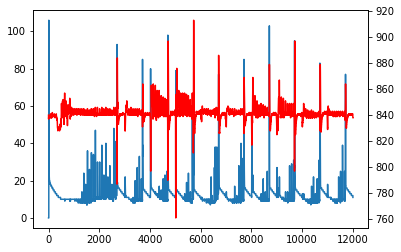

test_data\0_gu4.txt


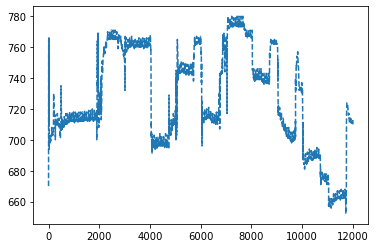

record:4043
record:4752
record:8035
record:8714
record:9739
record:10721
record:11745
[[766 765 765 ... 696 696 697]
 [696 695 696 ... 711 711 710]
 [768 768 768 ... 739 739 739]
 ...
 [701 701 701 ... 750 750 750]
 [688 689 689 ... 675 675 675]
 [663 662 662 ... 715 715 715]]


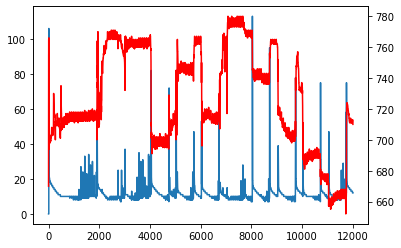

test_data\0_gu5.txt


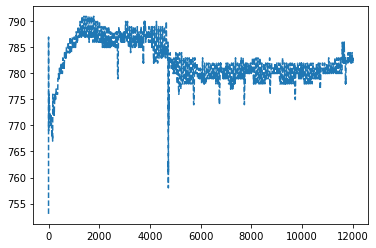

record:2721
record:4721
record:11582
[[786 785 786 786 786 785 785 785 785 785 785 785 785 785 785 785 785 785
  785 785 785 785 785 785 785 785 785 785 785 785 785 785 785 785 785 785
  785 786 786 786 787 787 787 787 788 788 788 787 788 788 787 787 787 787
  787 786 786 786 786 786 786 785 786 785 785 785 785 785 785 785 785 785
  785 786 785 785 786 786 786 786 786 786 786 786 787 787 788 788 788 788
  787 786 785 784 783 783 782 781 781 781 780 780 780 779 779 779 779 779
  779 779 779 779 779 779 779 779 779 779 779 779 779 780 781 781 782 783
  783 784 784 784 785 785 786 786 786 787 787 787 787 788 788 788 788 788
  788 788 789 788 788 789 788 788 788 788 788 788 788 788 788 788 788 788
  788 788 788 788 788 787 788 788 788 787 787 787 788 788 788 787 788 787
  787 787 787 787 787 788 787 788 787 787 787 787 787 787 787 787 787 788
  788 788]
 [783 783 784 784 783 784 784 784 784 784 784 784 785 786 786 787 788 788
  788 789 789 789 790 789 789 789 788 788 788 787 787 787 786 78

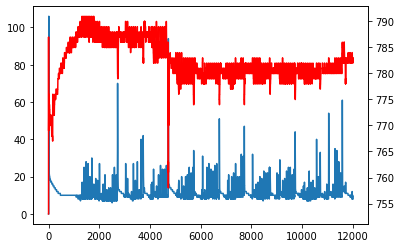

test_data\1_choki3.txt


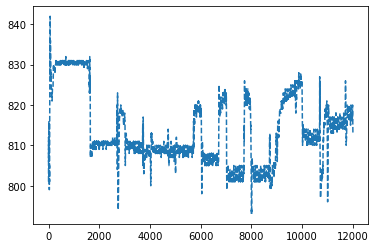

record:2697
record:3709
record:4717
record:5716
record:6712
record:7710
record:8715
record:10689
record:11703
[[811 811 811 ... 816 816 816]
 [808 809 808 ... 808 808 808]
 [810 810 810 ... 807 807 807]
 ...
 [803 802 802 ... 800 800 801]
 [811 811 811 ... 803 802 802]
 [815 814 815 ... 818 818 818]]


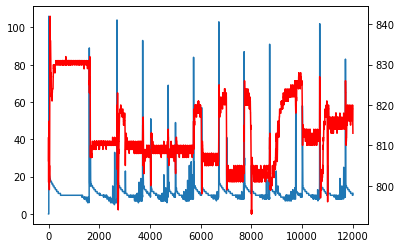

test_data\1_choki4.txt


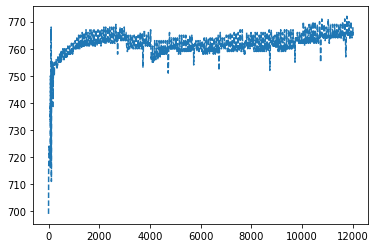

[]


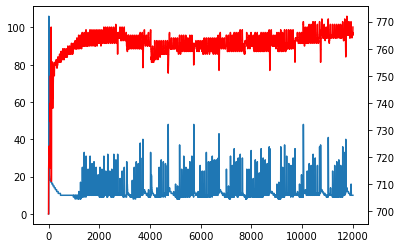

test_data\1_choki5.txt


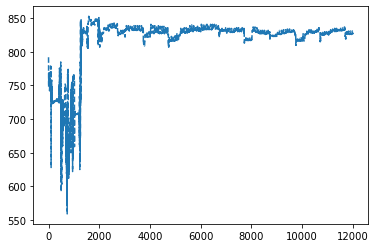

record:3741
record:7717
record:10710
[[832 832 832 832 832 832 833 833 832 833 833 833 833 834 834 835 836 837
  837 838 838 839 839 838 838 838 837 837 837 836 835 835 834 834 834 833
  833 833 833 833 832 832 832 832 832 832 832 832 832 832 833 832 832 832
  832 832 832 832 832 832 832 832 832 833 833 833 833 831 831 834 837 838
  837 838 832 837 837 837 834 835 834 832 831 830 829 830 830 830 831 831
  831 832 832 832 832 832 823 814 817 817 816 816 815 814 814 814 813 813
  812 812 812 812 812 813 812 812 812 812 812 812 812 812 812 812 812 812
  812 811 811 811 811 811 811 809 809 809 809 810 809 809 809 809 809 809
  810 810 810 810 811 812 814 814 815 815 816 816 817 817 817 817 818 819
  820 821 822 823 823 824 824 826 826 826 826 826 825 825 825 824 824 823
  823 823 822 822 822 822 822 822 822 822 822 822 822 822 822 822 822 822
  822 822]
 [831 831 831 831 831 831 831 832 833 833 834 834 835 836 836 836 836 836
  836 836 835 835 835 834 834 834 833 833 833 832 832 832 832 83

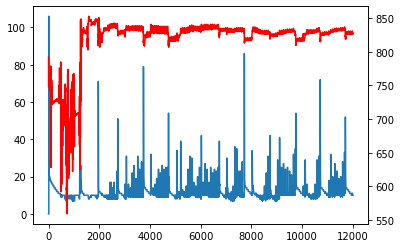

test_data\2_par3.txt


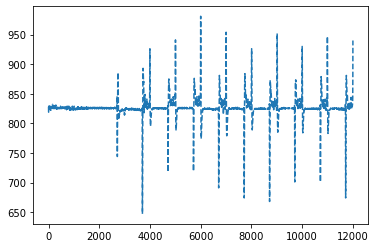

record:2695
record:3694
record:4705
record:5710
record:6703
record:7708
record:8708
record:9702
record:10710
record:11706
[[827 827 827 ... 815 815 815]
 [823 822 823 ... 835 836 837]
 [825 825 825 ... 835 834 834]
 ...
 [825 825 825 ... 831 832 832]
 [824 824 824 ... 831 831 831]
 [823 823 823 ... 826 826 827]]


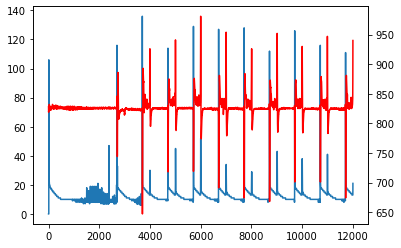

test_data\2_par4.txt


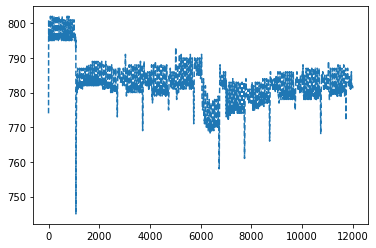

record:5011
[[781 781 781 781 781 781 781 781 782 781 781 782 782 782 782 782 782 782
  782 782 782 782 782 783 783 784 784 785 785 785 786 786 786 786 785 785
  785 784 784 783 783 783 783 782 782 781 781 781 781 782 782 782 782 782
  782 782 782 782 782 782 782 782 781 781 781 781 781 781 781 781 781 781
  781 781 781 781 781 781 781 781 781 782 781 782 782 782 782 782 782 782
  783 783 784 785 785 787 788 790 791 791 792 793 792 793 792 791 791 789
  788 787 786 786 785 784 783 783 782 782 782 782 781 781 781 782 781 781
  781 781 781 780 780 780 780 779 779 779 779 779 779 778 778 779 779 779
  779 779 779 779 779 779 779 779 780 780 780 780 780 780 780 780 780 780
  780 780 780 780 781 782 784 785 786 788 788 788 788 788 788 787 786 786
  785 784 783 782 782 782 781 780 780 780 780 780 780 781 781 781 781 781
  781 781]]


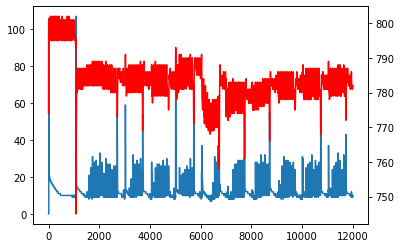

test_data\2_par5.txt


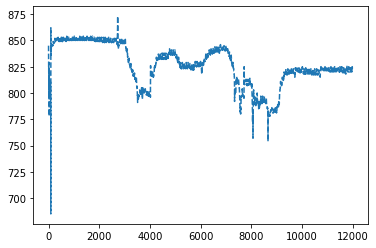

record:2722
record:4019
[[849 849 849 849 849 849 849 848 848 849 849 848 848 848 848 848 848 848
  848 848 849 849 849 849 849 849 849 849 849 849 849 849 849 850 850 851
  851 852 852 852 852 852 852 852 851 851 851 851 850 850 850 850 849 849
  849 849 849 849 849 849 849 849 849 849 849 849 849 849 849 849 849 849
  849 848 848 849 848 848 848 848 848 848 847 847 847 846 847 846 847 847
  849 850 850 851 853 855 856 856 857 860 863 866 871 873 872 870 867 864
  861 859 857 854 853 851 850 848 847 846 846 845 844 844 843 843 843 843
  843 842 843 843 843 843 843 843 843 843 844 844 844 844 845 845 845 845
  845 846 845 845 846 845 846 846 846 846 846 846 847 846 847 847 847 847
  847 847 847 847 847 847 847 847 848 847 848 847 848 848 848 848 848 848
  849 849 850 850 850 851 851 851 851 851 851 851 850 850 850 850 849 849
  849 848]
 [797 797 797 797 797 797 797 797 797 797 797 797 797 798 797 798 798 798
  797 797 798 798 798 798 799 799 800 800 801 801 801 802 802 802 802 802
  8

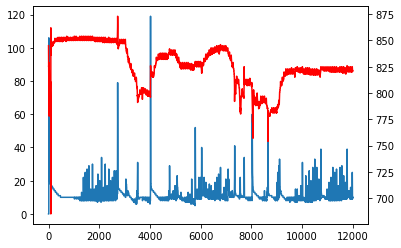

test_data\3_one4.txt


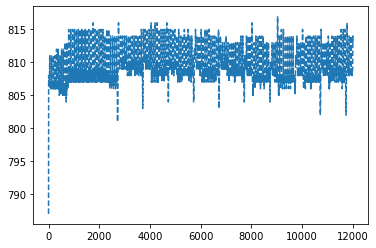

[]


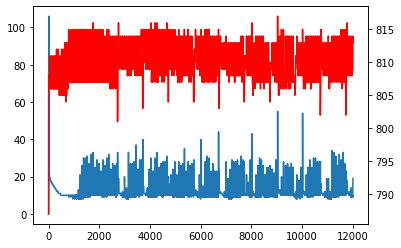

test_data\3_one5.txt


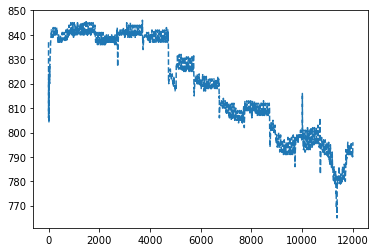

record:4729
record:10007
[[838 838 838 838 838 838 838 838 838 838 838 839 839 840 841 841 842 842
  842 843 842 842 842 842 841 841 840 840 840 839 839 839 839 838 838 838
  838 838 838 838 838 838 838 838 838 838 838 838 838 838 838 837 837 838
  837 837 837 837 837 837 837 837 837 837 837 837 837 837 838 839 840 841
  842 842 842 842 842 842 841 841 841 840 840 840 840 841 841 839 839 839
  839 838 838 837 836 835 835 834 822 823 822 822 821 821 821 821 821 820
  821 820 821 821 821 821 821 821 821 822 822 822 822 822 822 823 823 823
  823 823 823 823 823 823 823 823 823 823 823 823 823 823 823 823 823 823
  823 824 823 823 823 823 824 824 824 824 824 824 824 823 824 823 824 824
  824 825 825 826 826 826 826 826 826 826 826 826 826 825 825 825 825 825
  824 824 824 824 824 823 823 823 823 823 823 823 823 823 823 823 823 823
  823 823]
 [798 798 798 798 798 798 798 798 798 798 798 798 798 798 798 798 798 798
  798 799 799 799 800 800 800 800 800 801 801 801 800 800 800 800 800 799
  

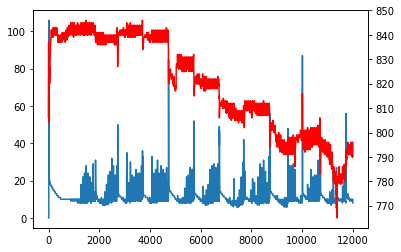

test_data\3_onerev_sampling100ms_relax7s_act3s_2byte.txt


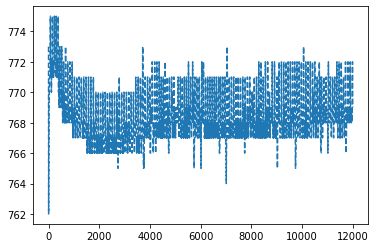

[]


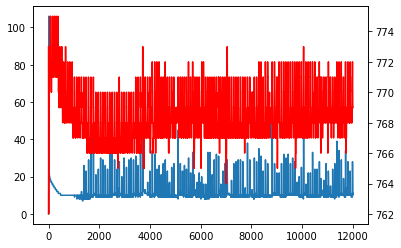

test_data\4_three3.txt


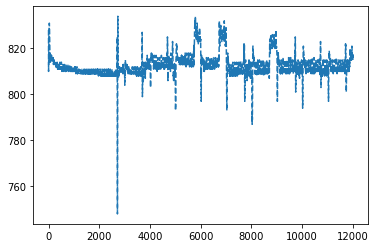

record:2703
record:3685
record:6729
record:7704
record:10016
record:11031
record:11708
[[809 809 808 ... 812 811 811]
 [809 809 810 ... 810 811 811]
 [812 813 813 ... 824 824 824]
 ...
 [813 812 812 ... 815 815 815]
 [810 810 809 ... 812 812 811]
 [811 810 810 ... 813 814 815]]


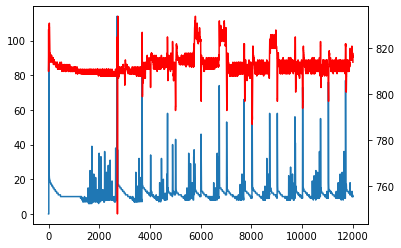

test_data\4_three4.txt


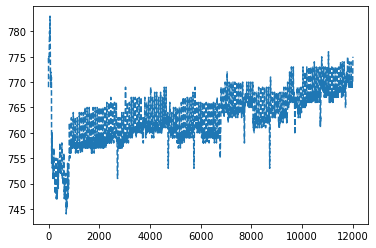

[]


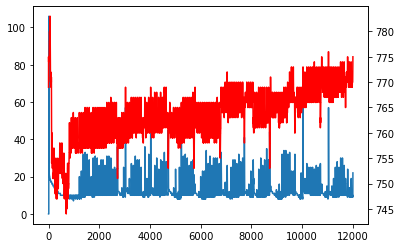

test_data\4_three5.txt


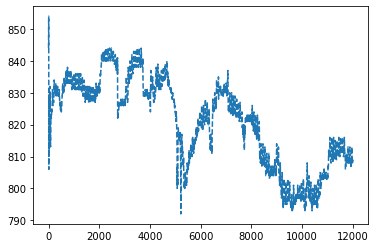

record:2723
record:8990
[[841 841 841 842 842 842 842 842 842 842 842 841 841 841 840 840 840 839
  839 839 839 839 839 838 839 839 839 839 839 839 839 839 839 839 839 839
  838 838 838 838 838 838 838 838 838 838 838 838 838 838 837 838 837 837
  837 838 837 837 838 837 838 838 837 838 838 838 838 838 838 838 838 838
  838 839 839 840 840 840 841 841 841 840 840 840 839 838 838 837 837 837
  837 838 838 838 837 836 841 839 826 824 823 822 822 822 823 823 823 823
  823 823 823 822 823 822 823 823 823 823 823 823 823 823 823 824 824 824
  823 824 824 824 824 824 824 824 824 824 824 824 824 825 825 825 825 825
  825 825 825 826 825 826 826 826 827 826 827 827 827 827 827 827 827 827
  826 826 826 826 826 826 826 826 826 826 826 826 826 826 826 826 826 826
  826 826 826 826 826 826 826 826 826 826 826 826 826 826 826 826 826 826
  826 826]
 [805 805 805 805 805 805 805 806 805 805 805 805 805 806 805 805 806 805
  806 806 807 807 807 808 808 808 808 808 808 809 807 808 807 807 807 806
  8

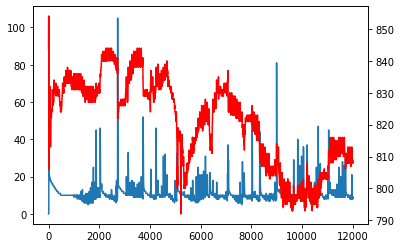

test_data\5_four3.txt


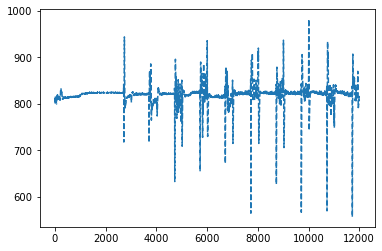

record:2708
record:3706
record:4716
record:5720
record:6706
record:7716
record:8722
record:9705
record:10724
record:11717
[[825 825 825 ... 805 806 806]
 [821 821 821 ... 765 767 769]
 [821 822 822 ... 783 786 788]
 ...
 [821 821 821 ... 829 828 827]
 [821 821 821 ... 803 800 799]
 [816 816 817 ... 836 833 830]]


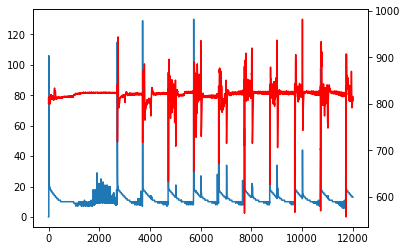

test_data\5_four4.txt


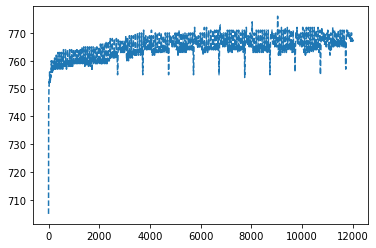

record:9029
[[765 765 766 766 765 766 766 766 766 766 766 766 766 766 766 766 766 766
  766 766 767 767 768 768 769 769 770 770 769 769 769 769 768 768 768 768
  767 767 767 766 766 766 766 766 766 766 766 766 766 766 766 766 766 766
  766 766 766 766 765 765 765 765 765 765 765 765 765 765 765 765 765 765
  765 765 765 765 766 766 766 766 766 766 766 766 766 766 766 766 766 766
  767 767 768 769 770 771 773 773 775 775 776 776 776 776 776 775 775 774
  774 773 772 772 771 770 770 769 768 768 768 767 768 767 767 767 766 766
  766 765 765 765 764 764 764 763 763 763 763 763 762 763 763 763 763 762
  763 763 763 763 763 763 763 763 763 763 763 763 763 763 763 763 763 763
  763 763 763 763 763 764 765 766 767 768 769 770 771 770 770 770 769 769
  768 767 767 766 766 765 764 764 764 763 763 763 763 763 763 763 764 763
  764 764]]


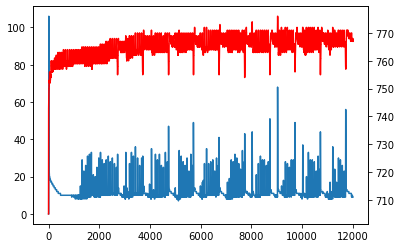

test_data\5_four5.txt


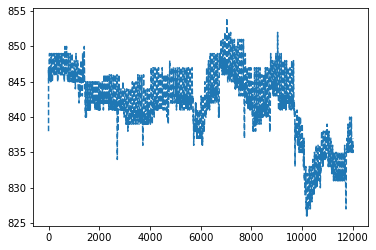

[]


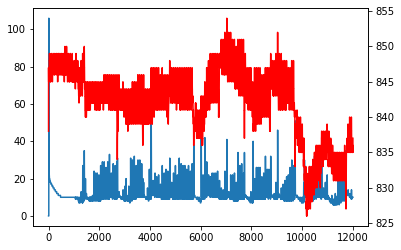

test_data\6_fox3.txt


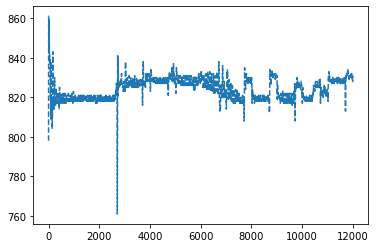

record:2712
record:3700
record:4717
record:7707
record:8706
record:11700
[[821 820 820 ... 827 826 827]
 [826 826 826 ... 828 828 828]
 [830 829 829 ... 831 831 831]
 [818 817 817 ... 831 831 831]
 [819 819 819 ... 833 833 834]
 [828 828 828 ... 834 833 833]]


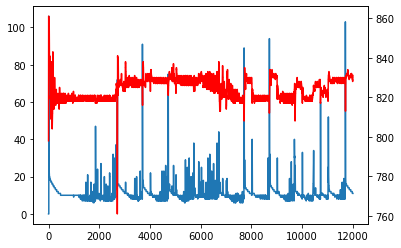

test_data\6_fox4.txt


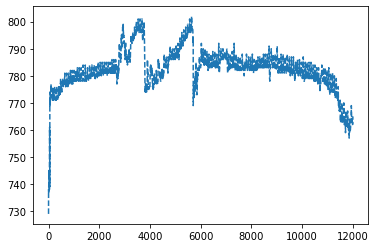

record:5706
[[797 797 797 797 797 797 797 797 797 797 797 797 798 798 798 798 799 798
  798 798 797 798 798 798 798 798 799 800 800 800 801 801 801 802 801 801
  801 801 800 800 800 799 799 799 799 798 798 798 797 797 798 797 798 798
  798 798 798 798 798 798 798 798 798 797 797 797 797 797 797 797 797 797
  797 797 797 797 797 797 797 797 797 797 797 796 796 795 795 794 794 794
  793 793 793 792 793 794 793 793 787 769 770 771 771 772 772 773 774 775
  775 777 777 777 776 777 776 776 776 776 776 775 775 774 774 774 773 773
  772 773 773 773 773 773 773 773 773 773 773 773 774 774 773 773 773 773
  773 773 773 773 773 773 773 777 777 778 778 778 777 776 776 775 775 774
  774 774 774 774 774 774 774 774 774 775 775 775 775 780 779 778 778 778
  778 778 778 779 779 780 780 781 781 782 782 782 781 781 781 781 781 781
  780 779]]


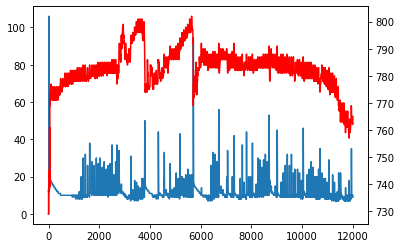

test_data\6_fox5.txt


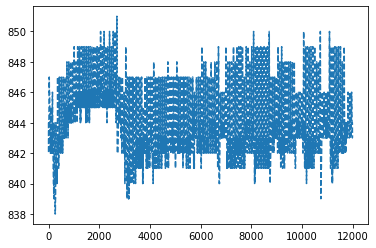

record:6994
record:11075
[[843 843 843 843 843 843 844 843 844 844 844 843 844 844 844 844 844 844
  844 844 844 845 845 845 846 845 846 846 846 846 846 845 845 845 845 845
  845 845 845 844 844 844 844 844 844 844 844 844 844 844 844 844 844 844
  844 844 844 844 844 844 844 844 844 843 844 844 843 843 843 843 843 843
  843 843 843 843 843 843 843 843 843 843 843 844 843 844 844 844 844 844
  844 845 845 846 847 847 848 849 849 849 849 849 849 849 849 848 848 847
  847 846 846 846 845 845 844 844 844 844 844 844 844 844 844 844 844 844
  844 844 844 844 843 843 843 843 843 843 842 842 842 842 842 842 842 842
  841 842 841 842 842 842 841 842 842 842 842 842 842 842 842 842 842 842
  842 842 842 842 842 843 844 845 846 846 847 848 848 848 848 847 847 847
  846 846 845 845 844 844 843 843 842 842 842 842 842 842 842 842 842 842
  842 842]
 [843 843 843 843 843 843 843 843 843 843 843 843 843 843 843 843 843 843
  843 843 843 844 844 844 844 845 845 846 846 846 846 846 846 845 845 845
  

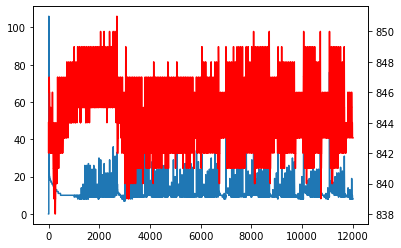

test_data\7_phone4.txt


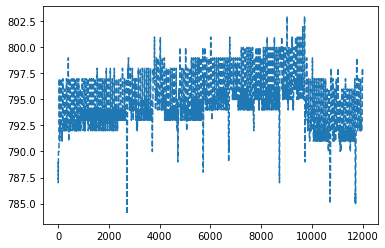

record:2710
[[795 796 797 797 797 797 797 797 797 797 796 796 796 795 795 795 794 794
  794 793 793 793 793 793 793 793 793 794 793 794 794 794 794 793 794 794
  793 793 793 793 793 793 793 793 793 793 793 793 793 793 793 793 793 793
  793 793 794 793 794 794 794 794 794 794 794 794 794 794 794 794 794 794
  794 794 794 794 795 795 795 796 796 797 797 797 797 797 796 796 795 794
  794 792 792 790 789 788 787 786 785 784 784 784 784 785 785 787 787 788
  788 789 789 789 790 790 791 791 791 792 792 793 793 793 794 795 795 795
  795 796 796 796 797 797 797 797 797 798 798 798 798 798 798 798 798 798
  798 798 798 798 798 798 798 797 798 798 798 798 799 799 799 799 799 799
  799 799 798 798 798 798 798 797 797 797 796 796 796 796 795 796 796 795
  795 796 795 795 795 795 795 795 795 795 795 795 794 795 794 795 794 794
  794 794]]


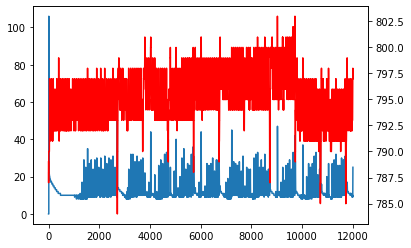

test_data\7_phone5.txt


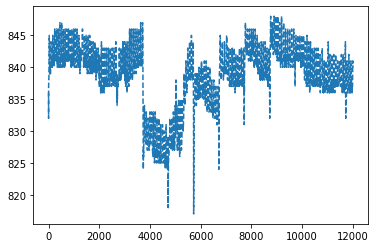

record:5720
record:6714
[[839 839 839 840 840 841 842 842 843 844 844 845 845 845 845 844 844 844
  843 843 843 842 842 841 841 841 840 840 840 840 840 840 840 840 840 840
  840 840 840 840 839 839 839 839 839 839 839 839 839 839 839 838 839 838
  838 839 838 838 839 839 839 839 839 839 839 839 839 839 839 839 839 839
  839 839 839 839 839 840 840 841 842 843 844 844 843 843 841 840 838 837
  836 835 835 835 834 834 835 832 819 818 817 818 818 818 819 820 822 824
  825 825 827 828 829 829 830 830 830 831 831 831 832 832 832 832 832 833
  833 833 833 834 834 834 834 834 834 834 835 835 835 835 835 835 835 835
  835 836 835 836 836 836 836 836 836 836 836 837 837 838 838 839 839 839
  839 839 839 839 839 838 838 838 838 837 837 837 836 836 836 836 836 836
  836 836 836 836 836 836 836 836 836 836 836 836 835 835 835 835 835 835
  835 835]
 [832 832 832 832 832 832 832 832 832 832 832 832 832 832 832 831 831 831
  831 831 831 831 831 831 831 831 831 831 831 831 831 831 831 831 831 831
  8

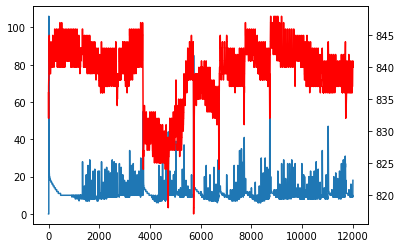

test_data\7_[phone3.txt


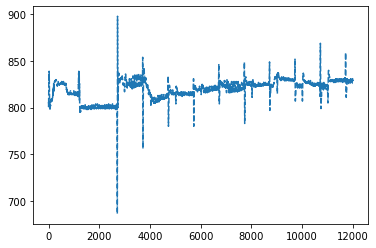

record:2706
record:3714
record:4713
record:5714
record:6707
record:7717
record:8709
record:9709
record:10705
record:11705
[[801 801 801 ... 828 828 828]
 [835 835 834 ... 828 828 828]
 [811 812 811 ... 817 817 817]
 ...
 [831 831 831 ... 824 824 825]
 [825 825 825 ... 825 825 825]
 [828 828 829 ... 829 829 828]]


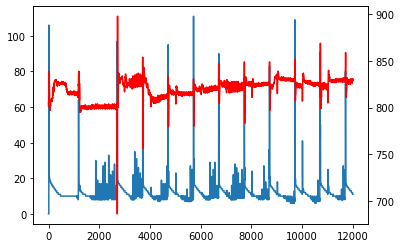

test_data\8_good4.txt


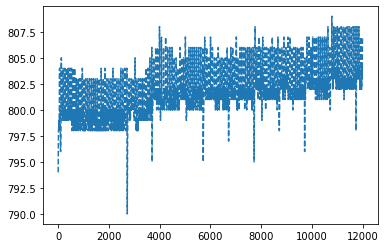

[]


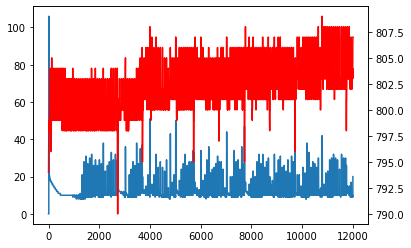

test_data\8_good5.txt


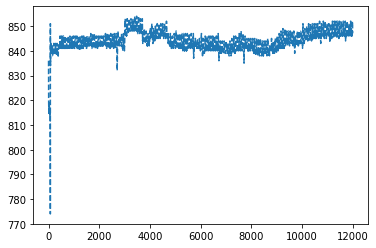

record:2705
[[844 843 843 843 843 843 842 842 842 842 843 843 843 843 843 843 843 842
  843 842 842 842 842 842 842 842 842 842 842 842 842 842 842 842 842 842
  841 842 842 842 842 842 842 842 842 842 842 842 842 842 842 843 843 844
  844 845 846 846 846 847 847 847 847 846 846 846 845 845 845 844 844 843
  843 843 843 843 843 843 843 843 843 844 843 844 844 844 844 844 844 844
  844 843 842 841 840 838 836 835 833 833 832 832 832 833 834 835 835 836
  837 837 838 839 839 840 840 841 841 842 842 842 843 843 843 843 844 844
  845 845 846 847 847 847 847 848 847 847 847 847 847 847 847 846 846 846
  846 846 845 845 845 845 845 845 845 845 845 845 845 845 844 844 844 844
  844 844 844 843 843 843 843 843 843 843 843 843 843 843 843 842 843 842
  843 843 843 843 843 843 843 842 843 843 843 843 843 843 843 843 843 844
  844 845]]


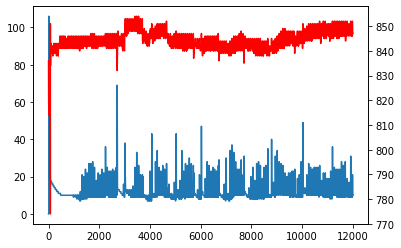

test_data\8_goodrev_sampling100ms_relax7s_act3s_2byte.txt


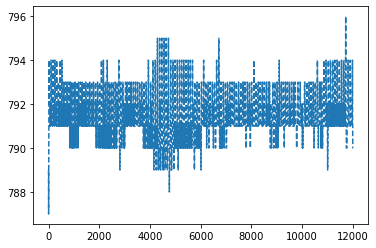

[]


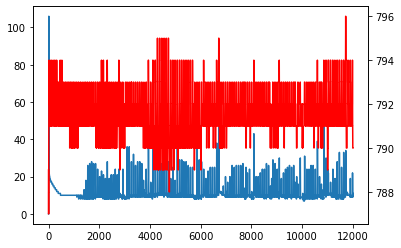

test_data\9_koyubi3.txt


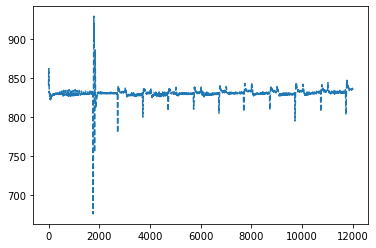

record:2717
record:3712
record:4707
record:5713
record:6711
record:7688
record:8716
record:9710
record:10726
record:11706
[[831 830 830 ... 832 832 832]
 [827 827 827 ... 835 834 834]
 [828 827 828 ... 834 834 834]
 ...
 [829 829 830 ... 835 836 835]
 [831 831 831 ... 835 835 835]
 [831 832 832 ... 838 838 838]]


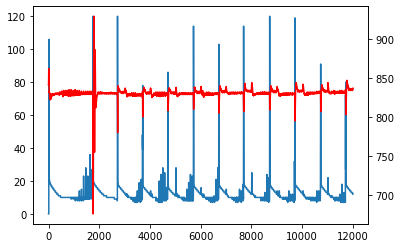

test_data\9_koyubi4.txt


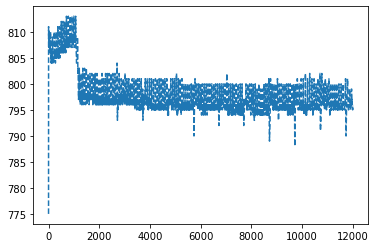

[]


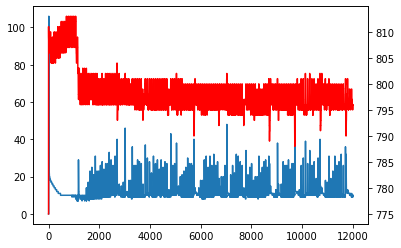

test_data\9_koyubi5.txt


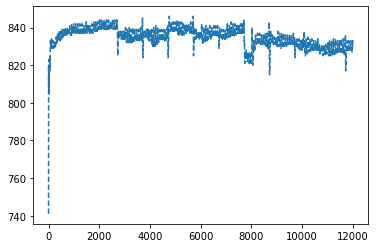

record:2719
[[840 840 840 840 839 840 840 839 840 840 839 839 839 839 839 839 839 839
  839 839 839 839 839 839 840 840 839 840 840 840 840 840 840 840 840 840
  840 840 840 840 840 841 841 842 842 842 843 843 844 844 844 844 844 843
  843 843 842 843 842 842 842 841 841 841 840 840 840 840 840 840 840 840
  840 840 840 841 841 841 841 842 842 843 843 843 844 843 843 843 843 843
  842 841 840 838 836 834 833 832 831 830 830 829 829 829 829 829 829 829
  828 827 825 825 826 827 827 829 830 831 832 833 834 835 836 836 837 837
  838 837 838 838 838 838 838 838 838 837 837 837 837 837 837 837 837 836
  837 837 837 837 837 836 837 836 836 836 836 836 836 836 836 836 836 836
  836 835 836 835 836 835 835 835 835 835 835 835 835 835 835 835 835 835
  835 835 835 835 835 835 835 835 835 835 836 836 836 837 837 838 838 838
  838 838]]


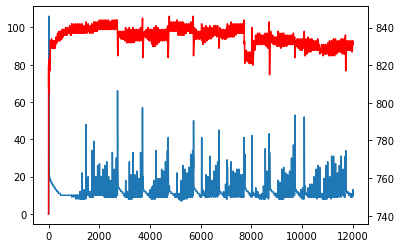

['gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'gu', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'choki', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'par', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'one', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'three', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'four', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox', 'fox'

E:\anaconda\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


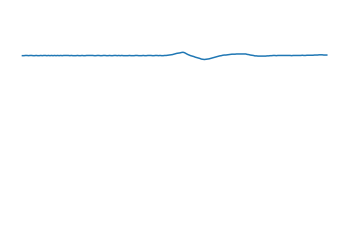

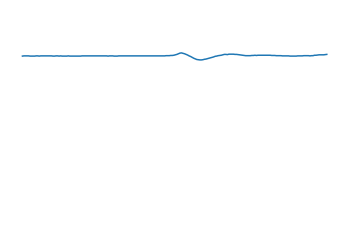

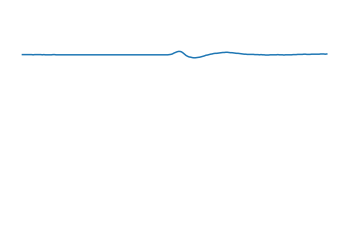

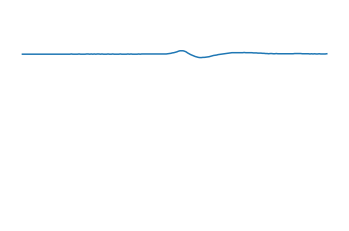

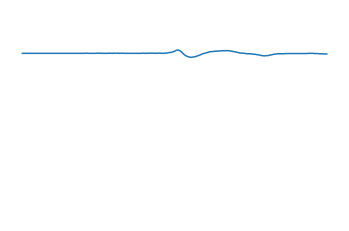

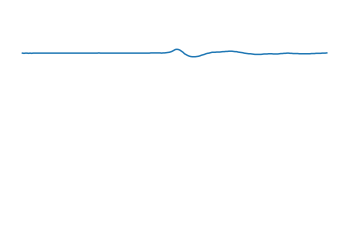

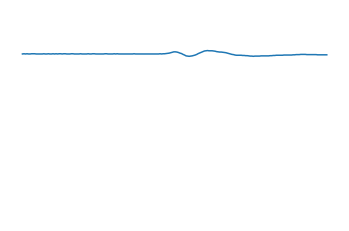

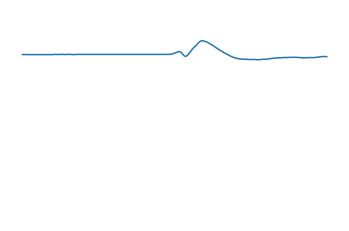

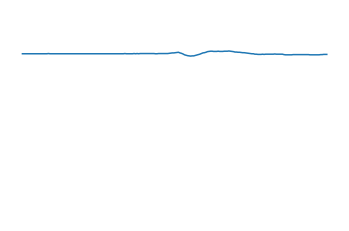

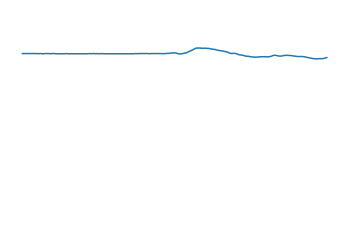

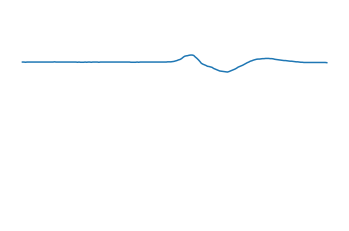

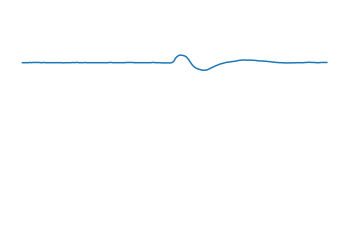

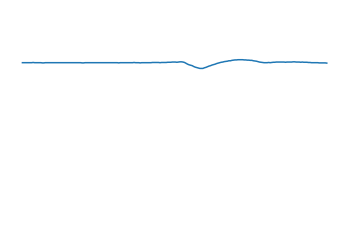

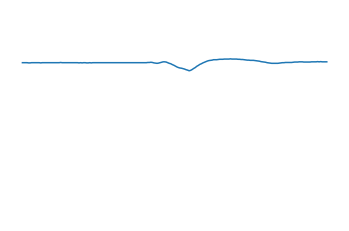

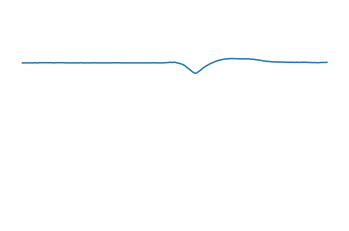

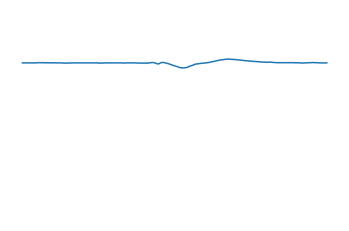

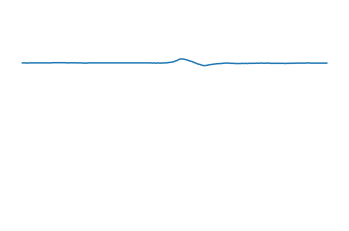

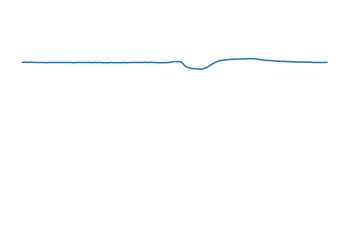

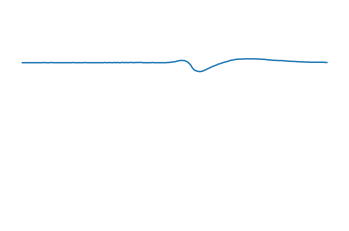

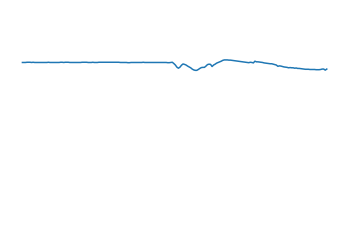

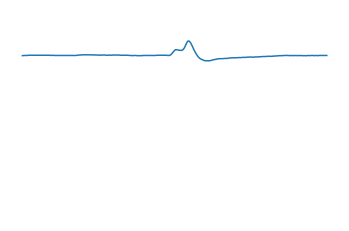

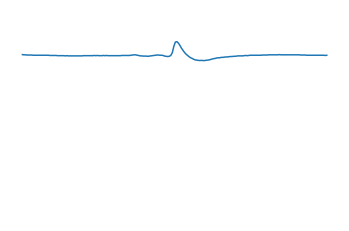

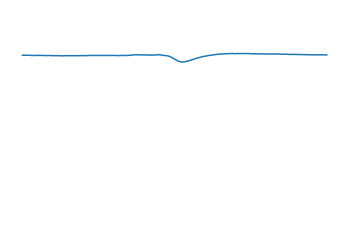

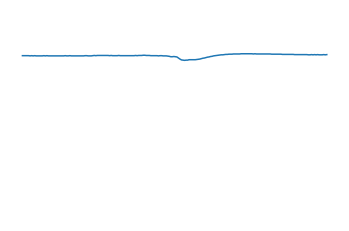

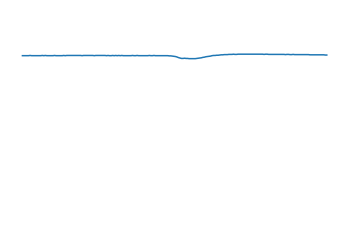

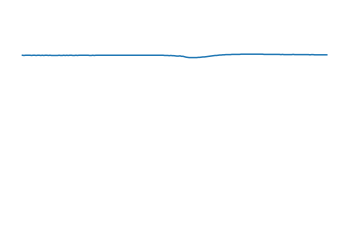

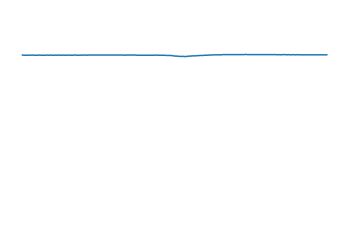

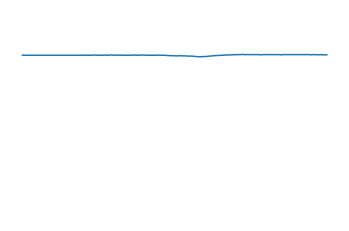

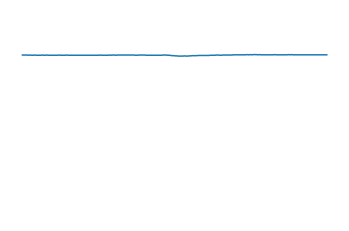

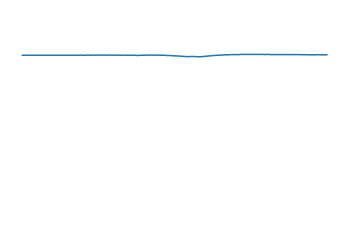

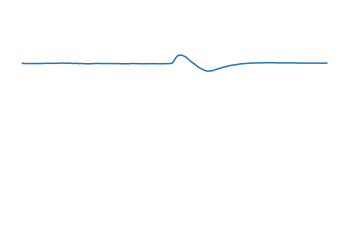

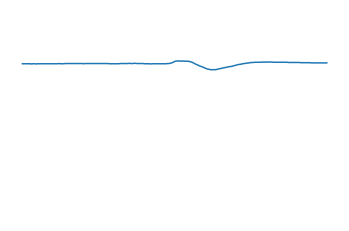

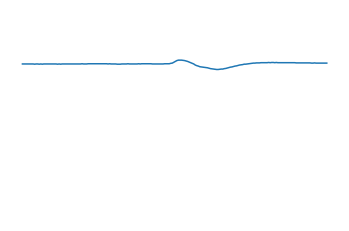

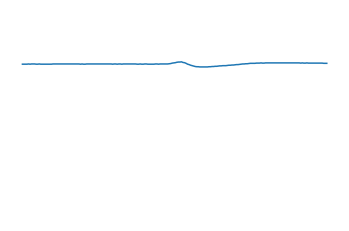

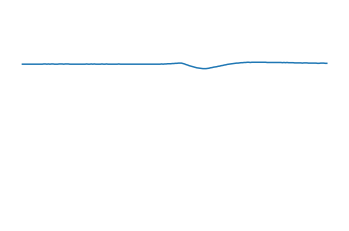

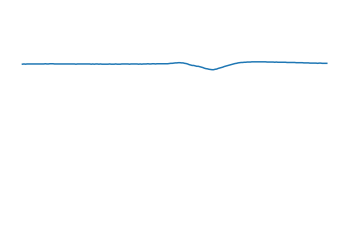

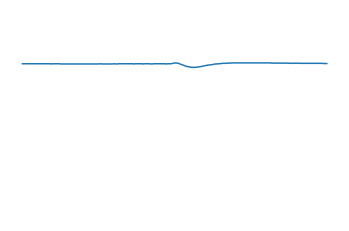

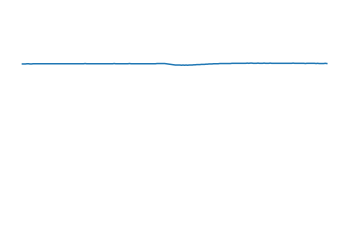

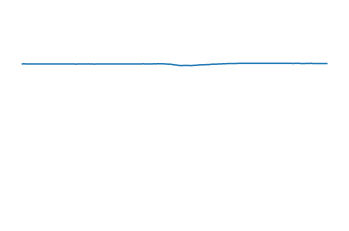

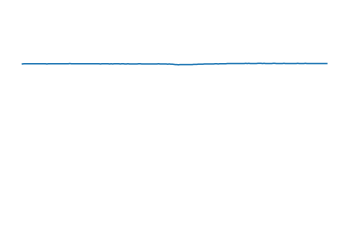

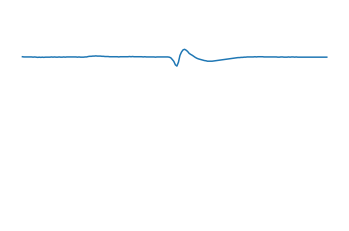

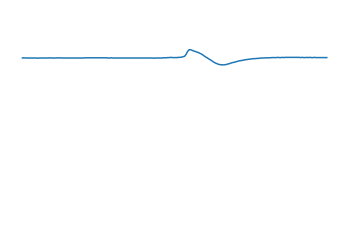

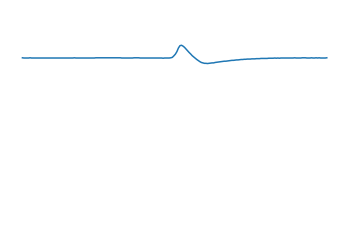

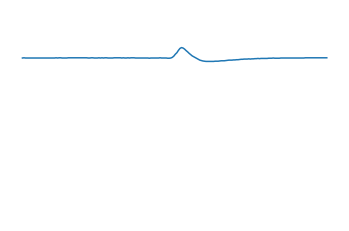

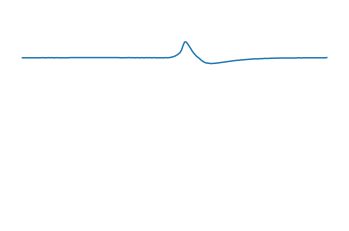

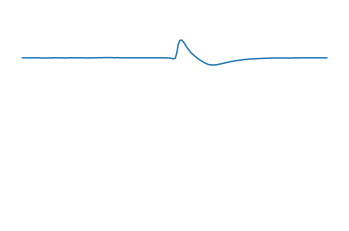

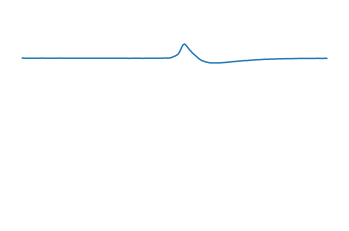

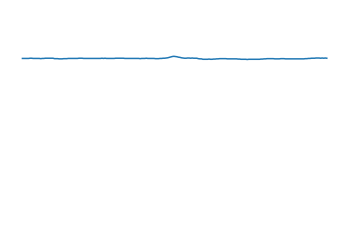

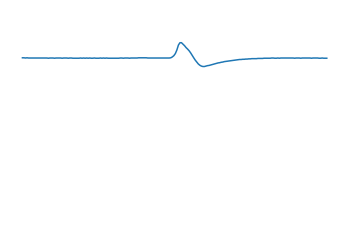

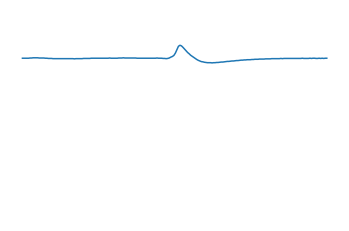

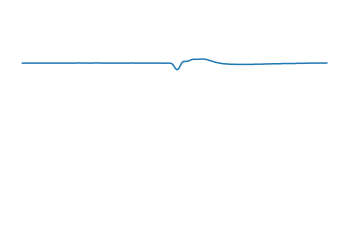

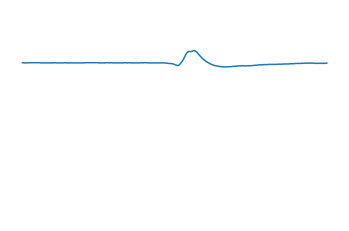

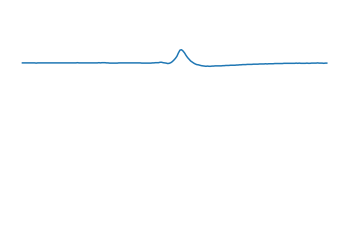

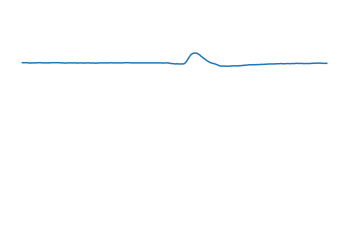

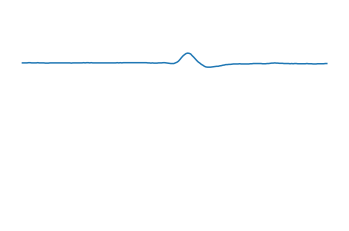

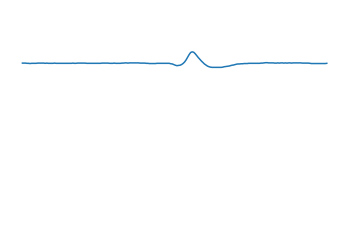

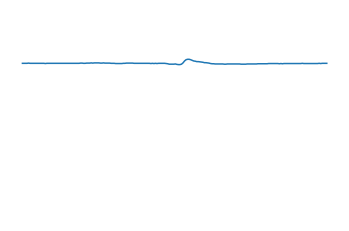

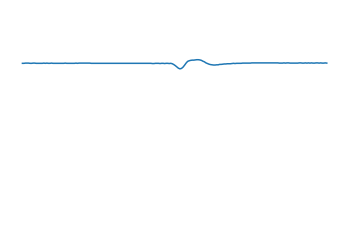

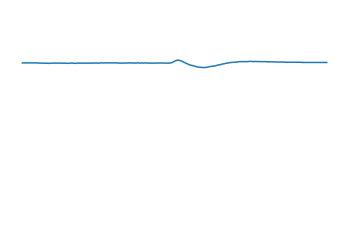

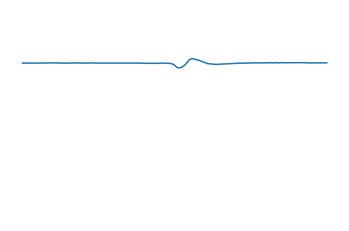

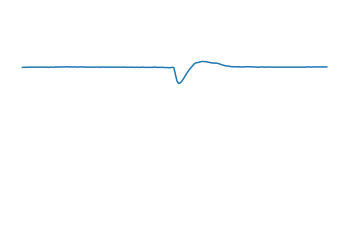

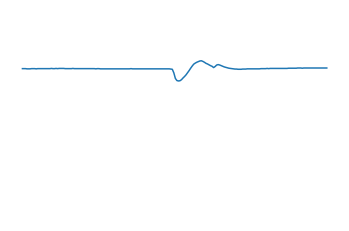

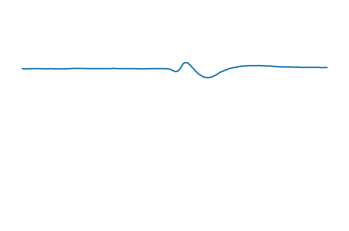

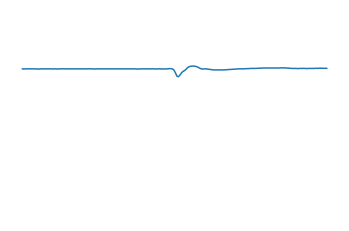

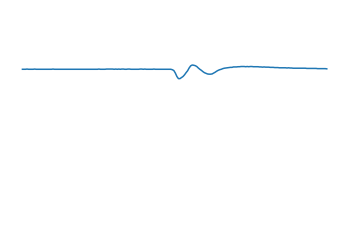

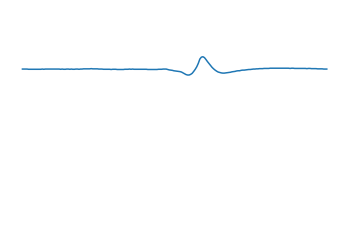

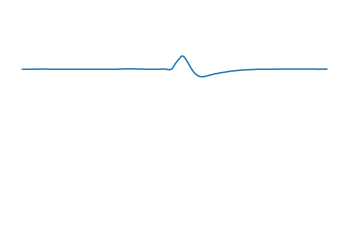

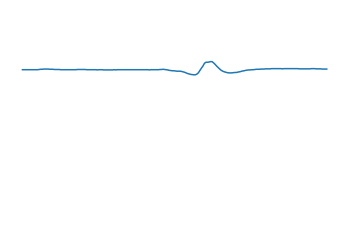

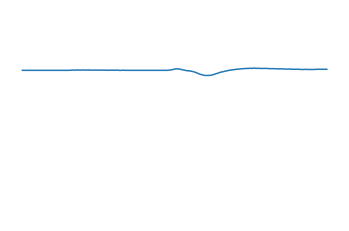

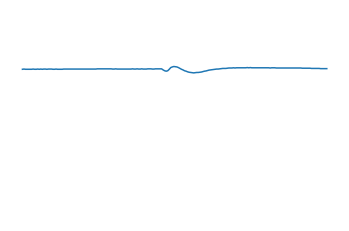

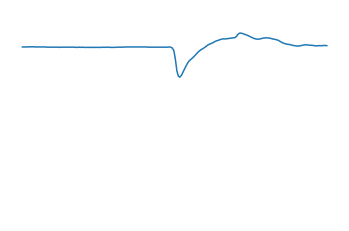

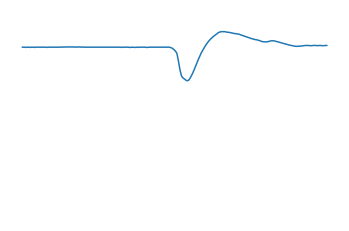

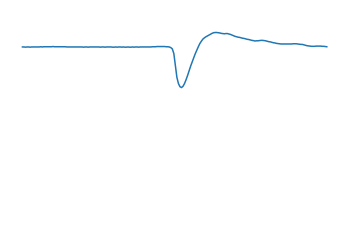

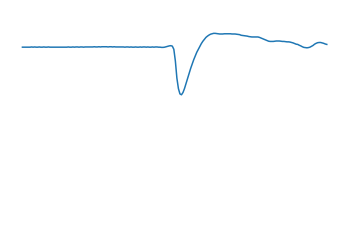

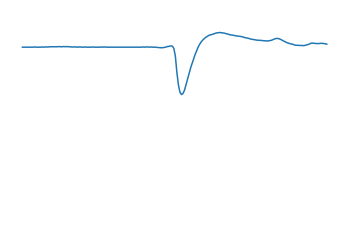

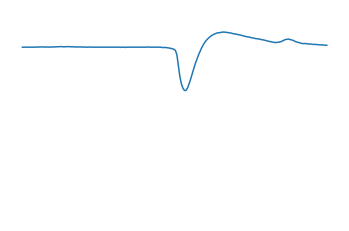

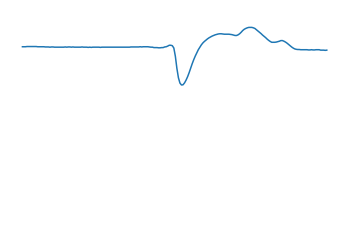

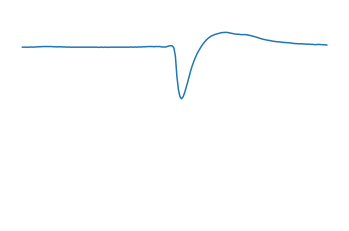

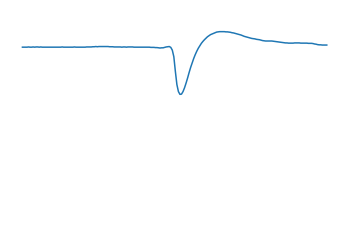

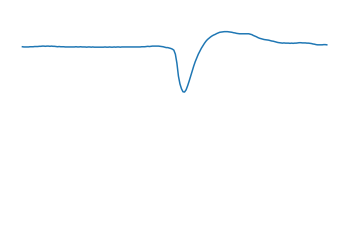

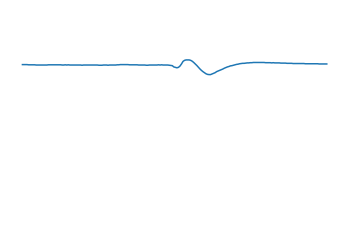

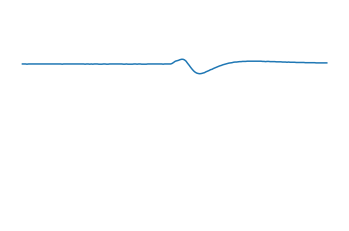

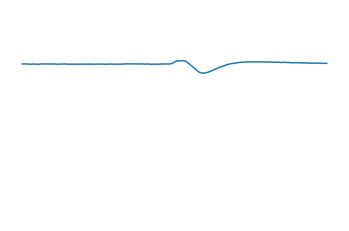

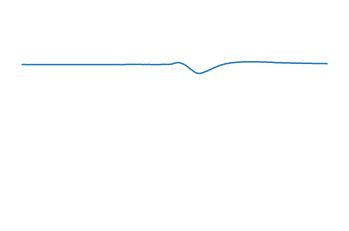

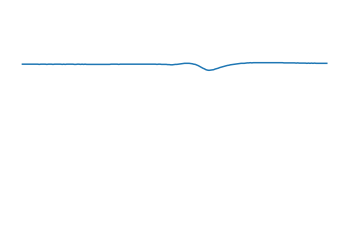

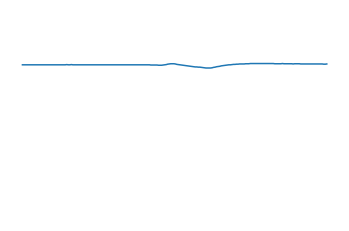

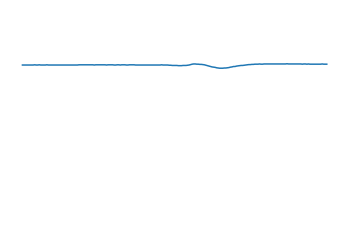

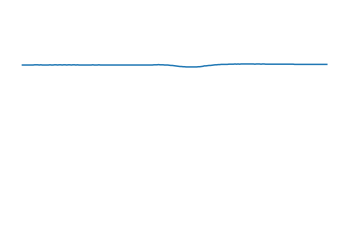

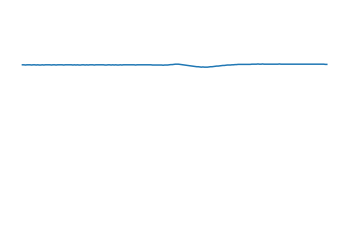

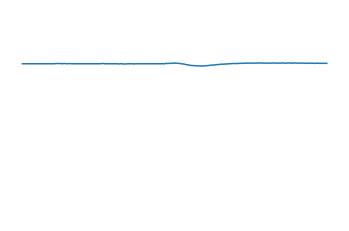

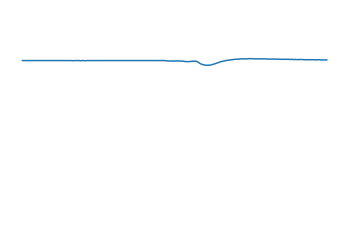

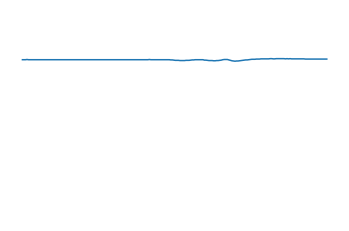

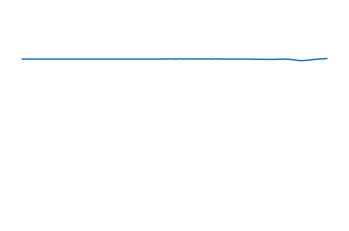

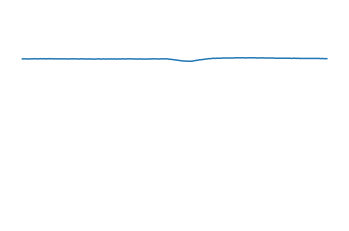

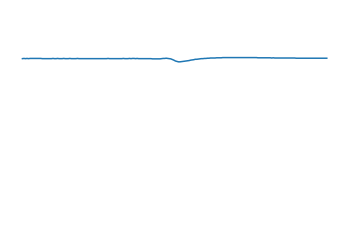

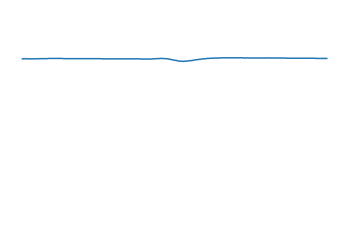

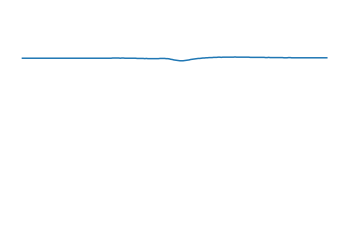

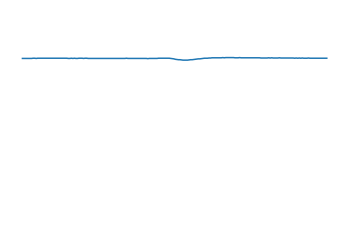

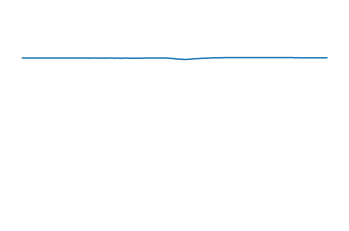

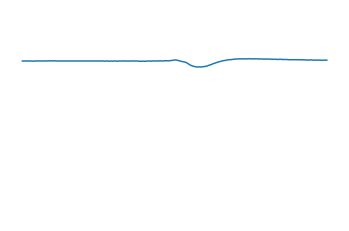

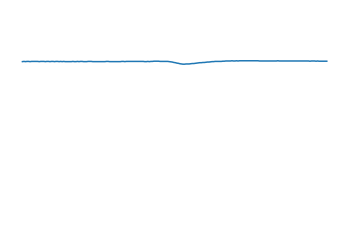

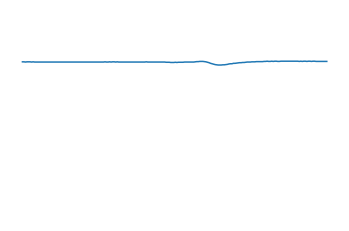

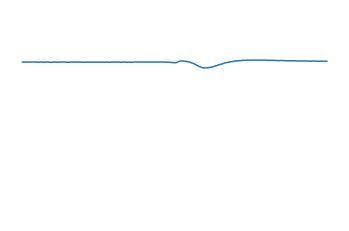

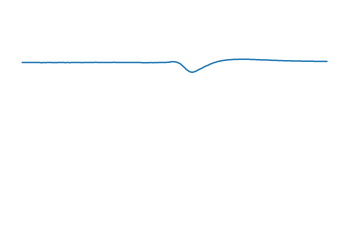

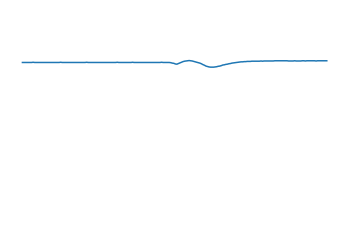

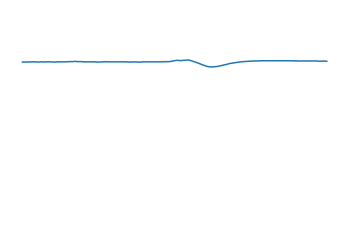

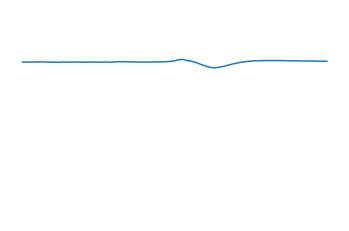

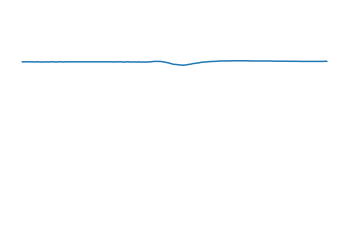

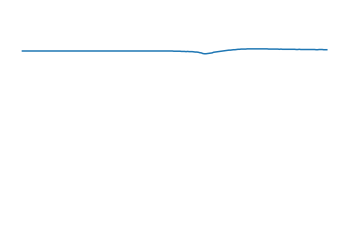

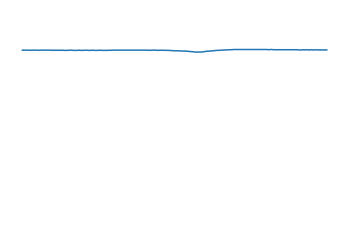

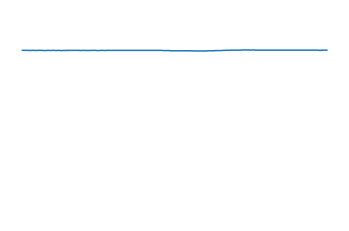

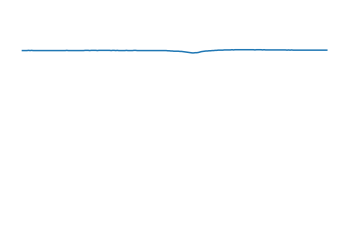

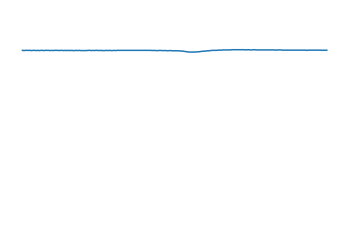

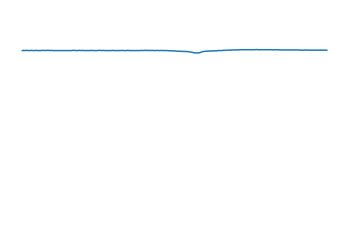

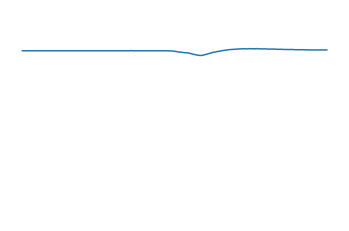

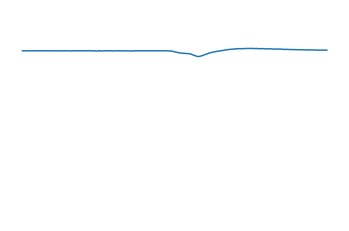

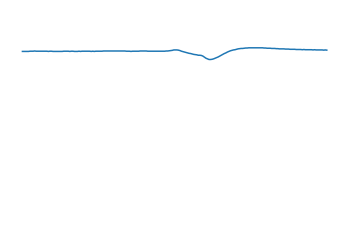

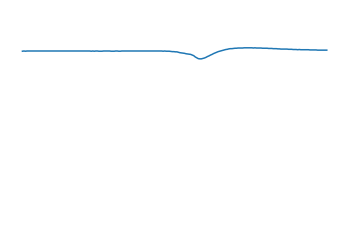

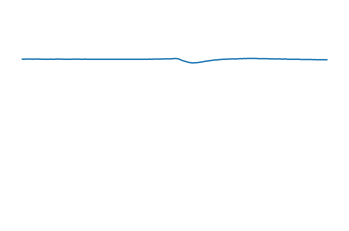

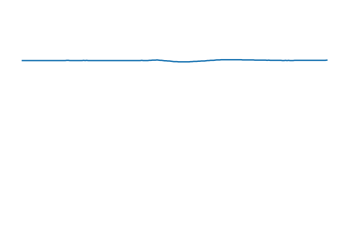

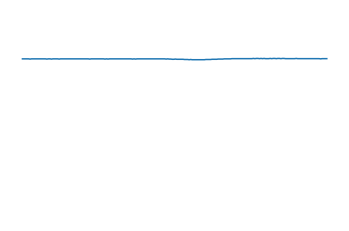

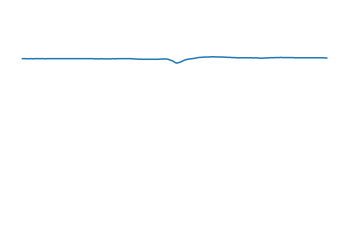

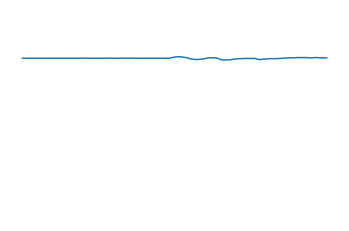

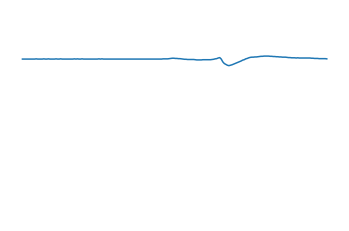

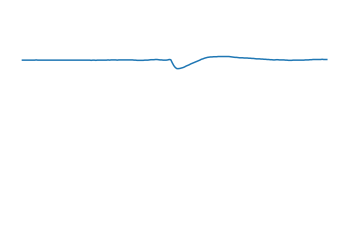

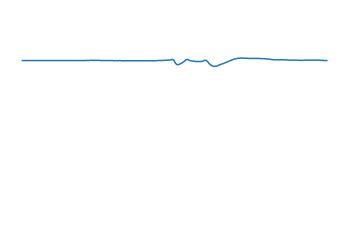

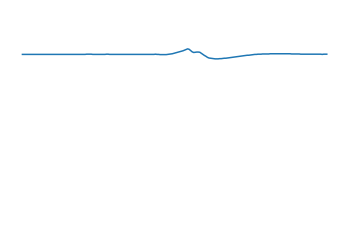

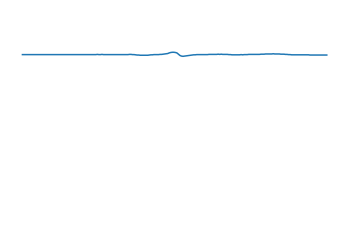

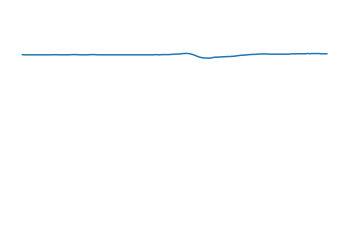

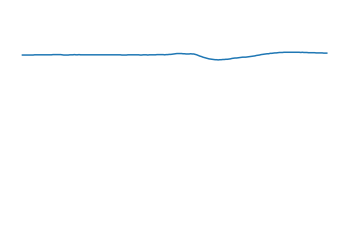

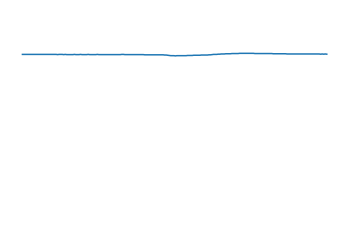

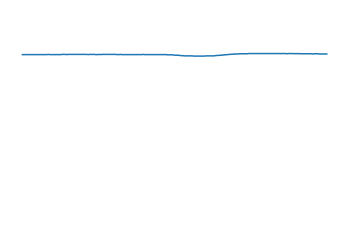

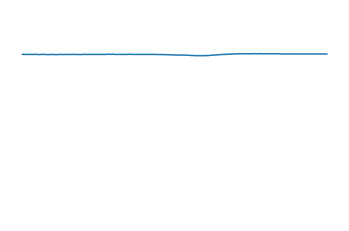

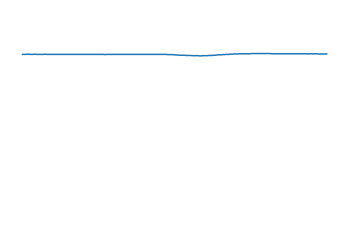

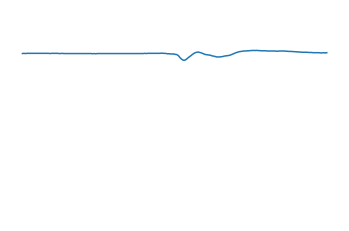

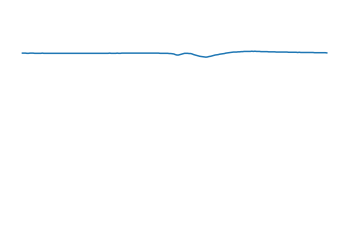

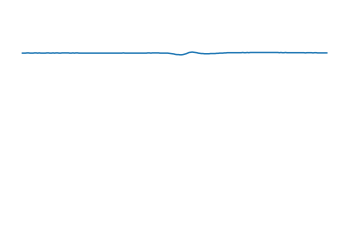

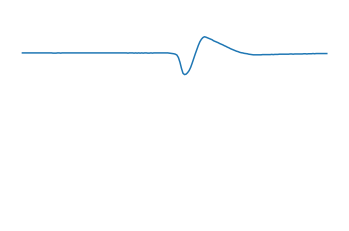

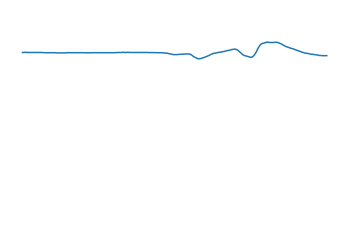

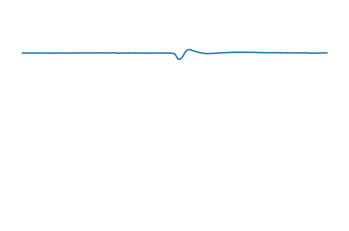

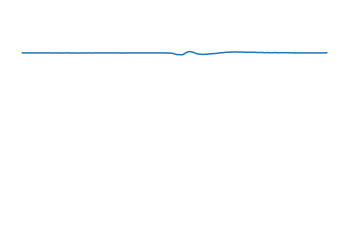

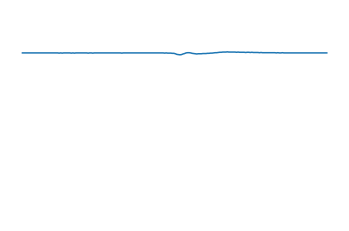

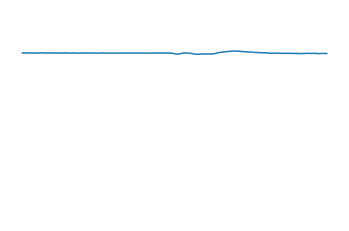

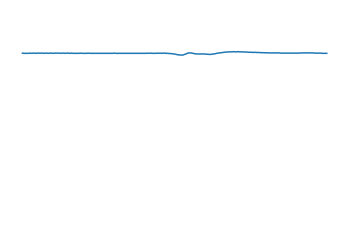

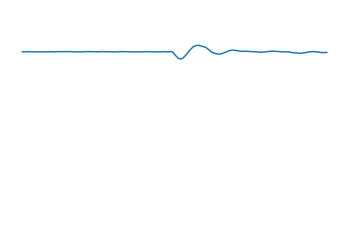

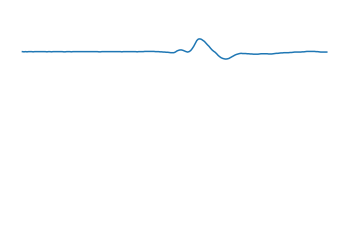

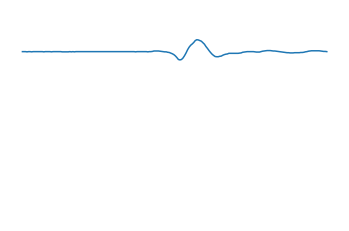

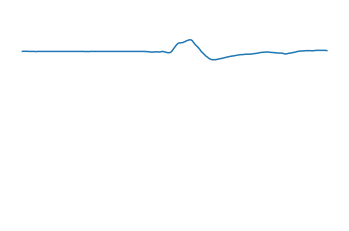

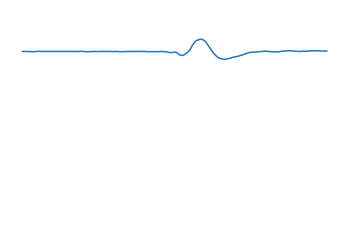

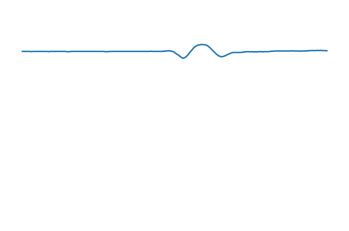

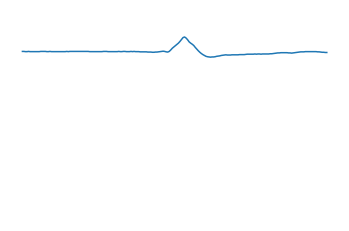

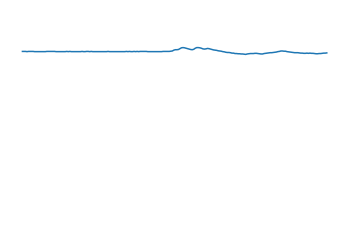

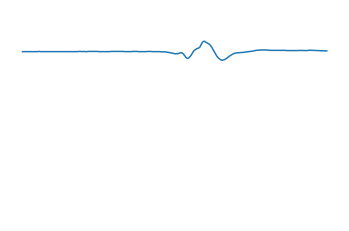

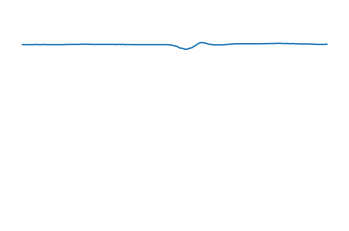

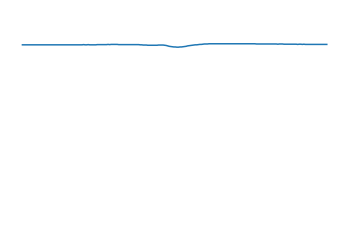

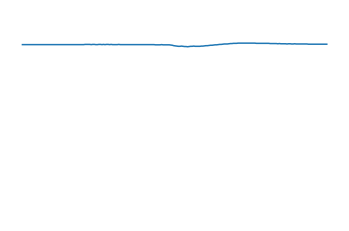

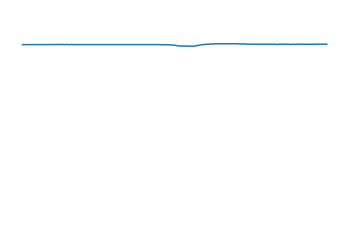

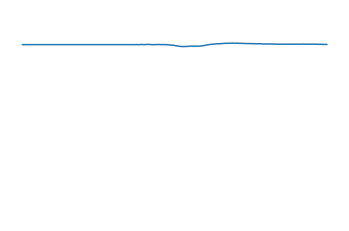

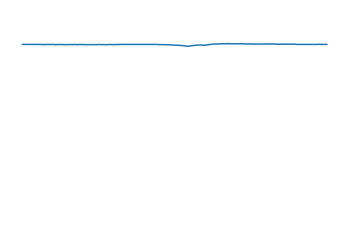

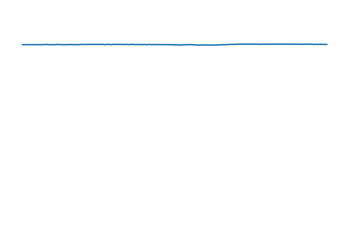

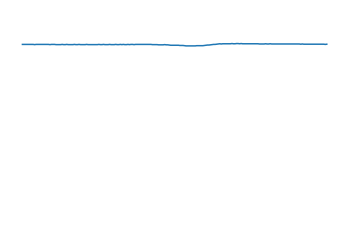

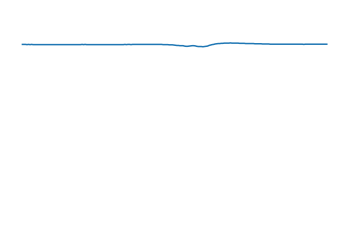

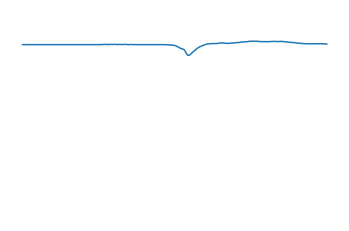

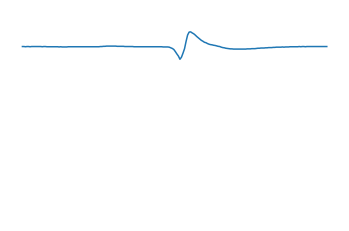

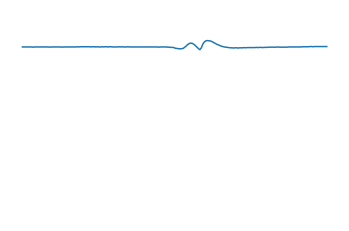

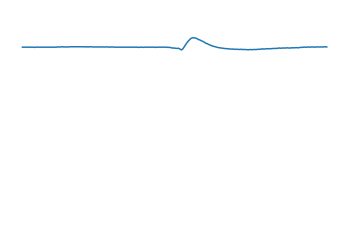

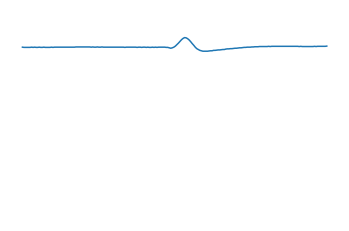

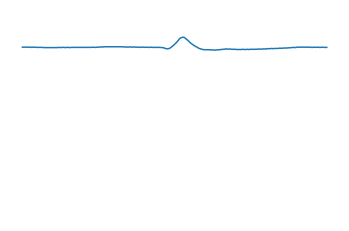

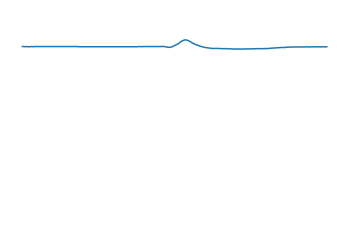

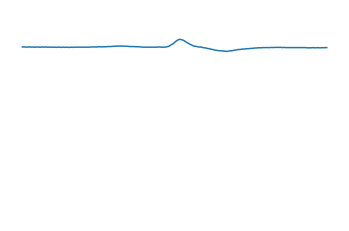

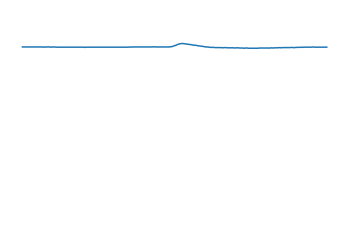

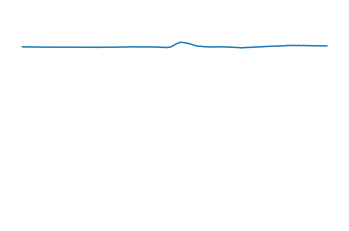

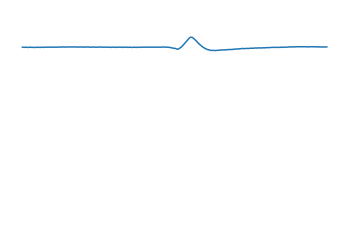

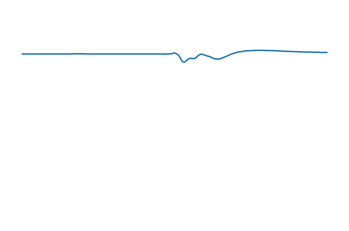

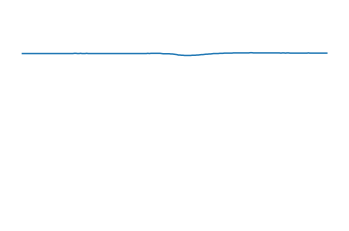

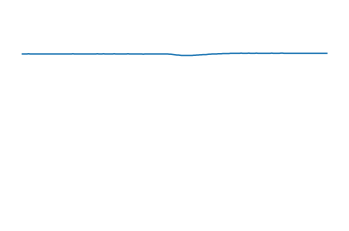

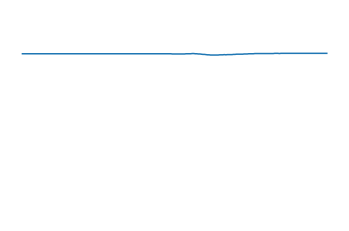

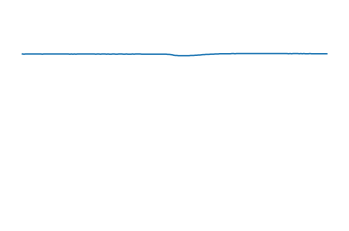

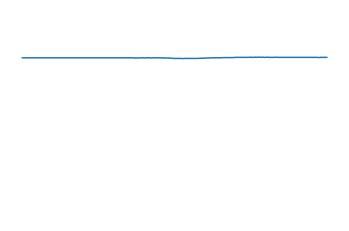

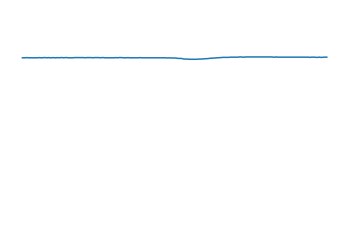

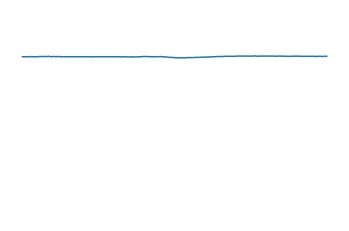

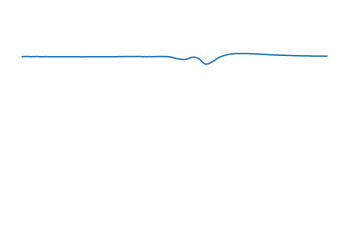

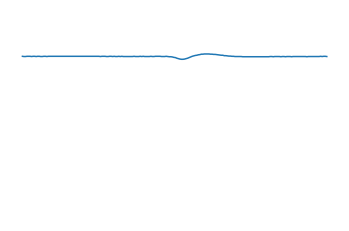

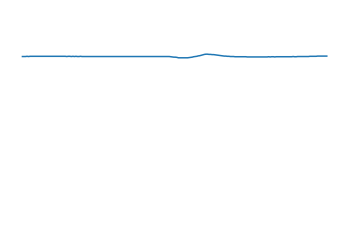

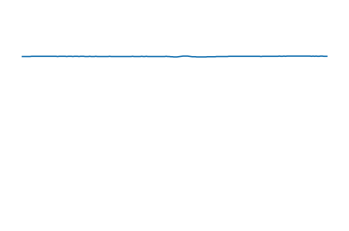

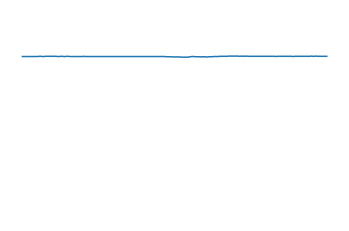

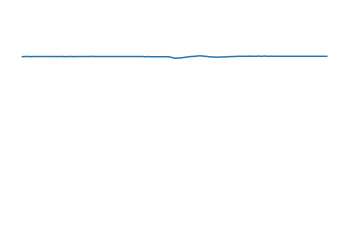

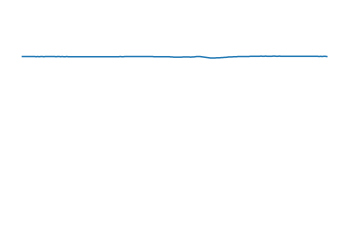

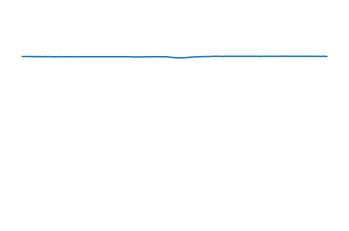

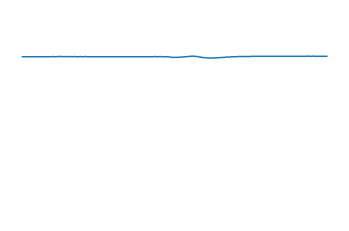

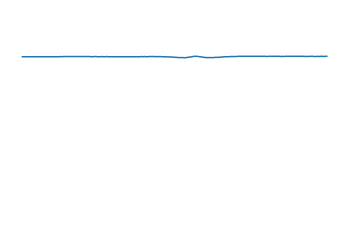

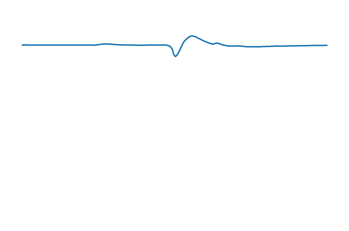

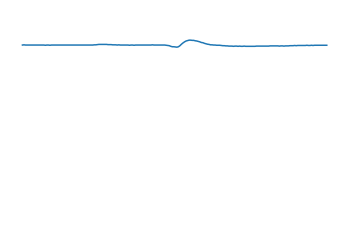

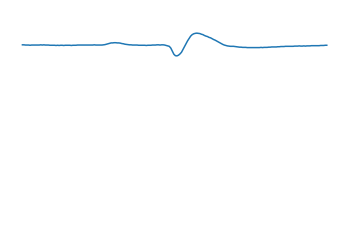

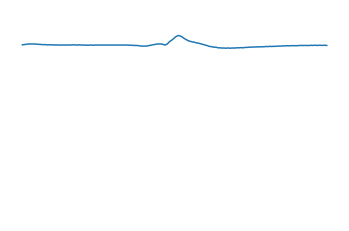

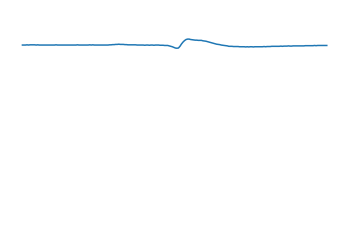

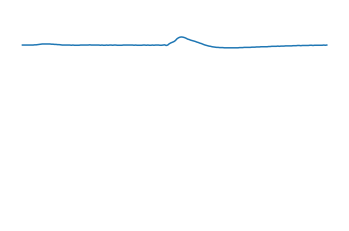

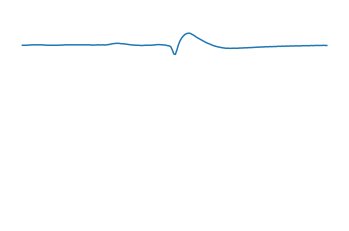

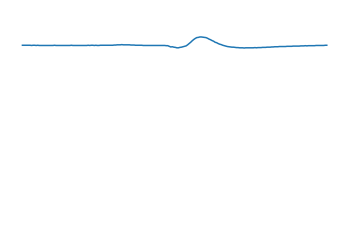

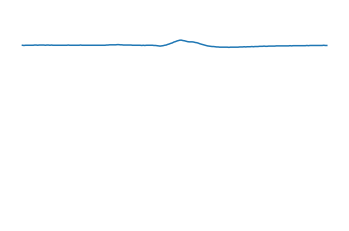

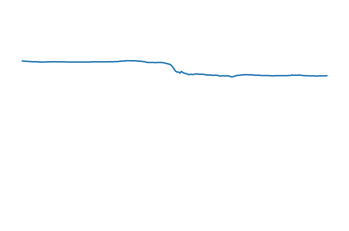

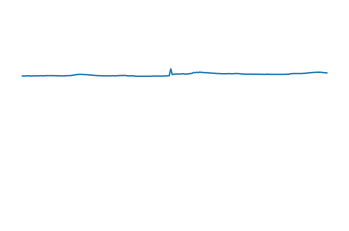

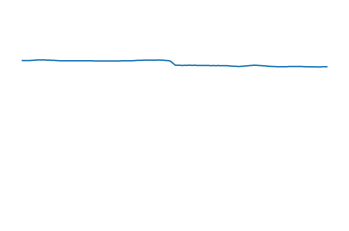

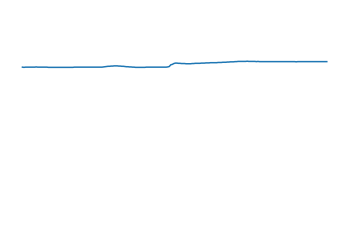

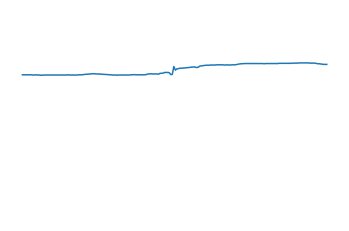

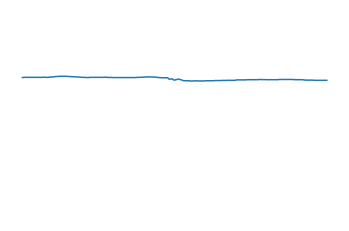

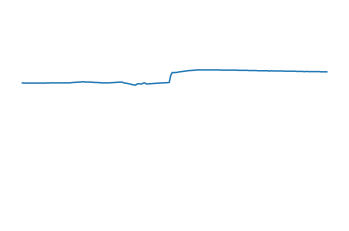

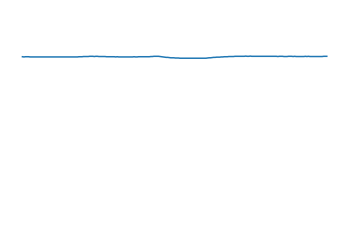

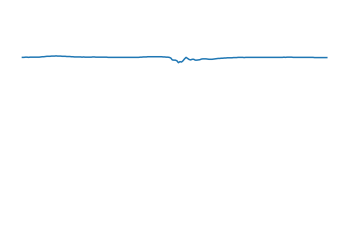

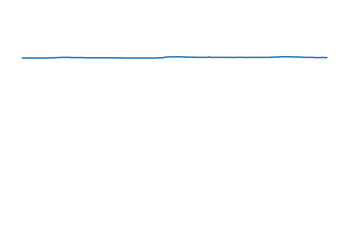

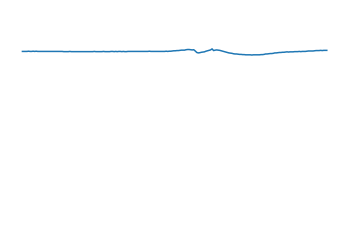

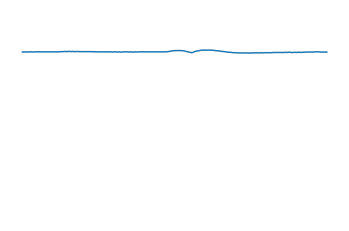

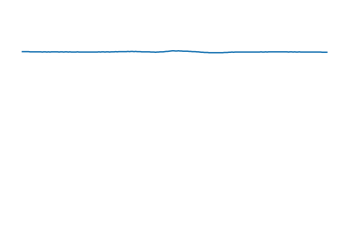

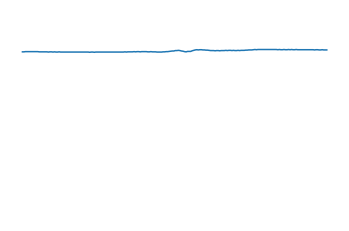

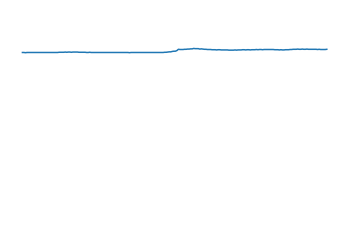

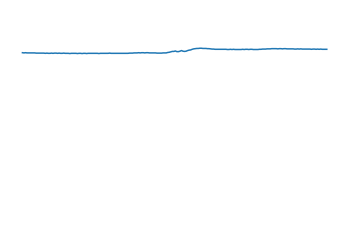

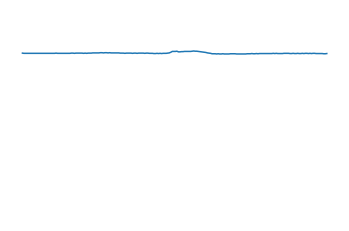

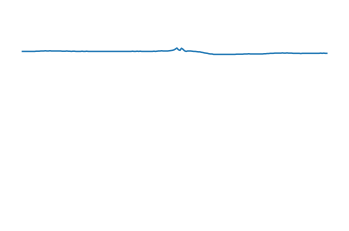

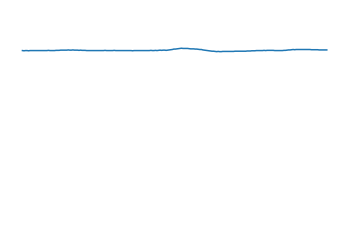

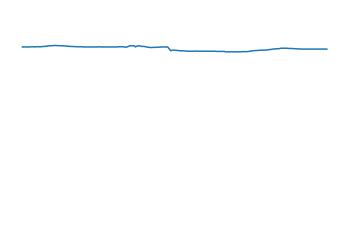

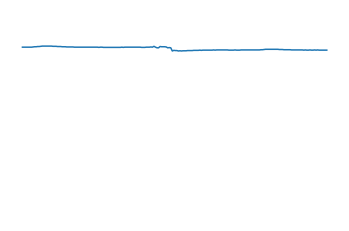

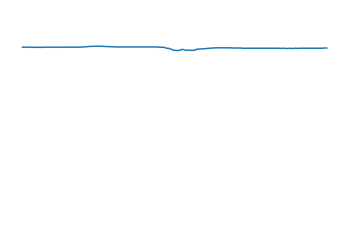

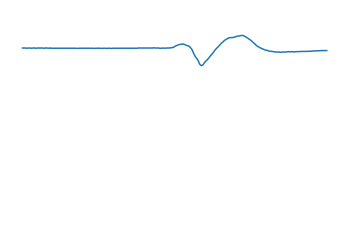

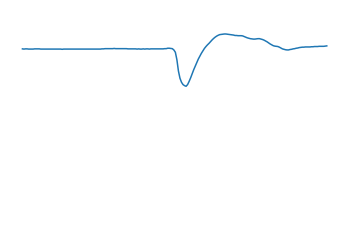

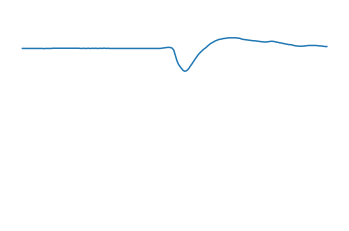

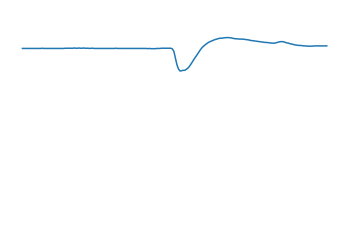

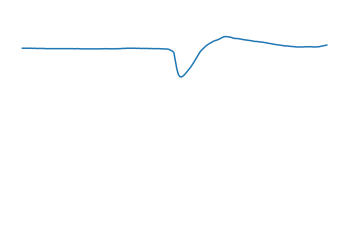

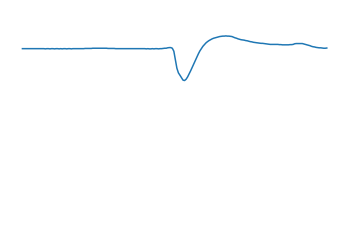

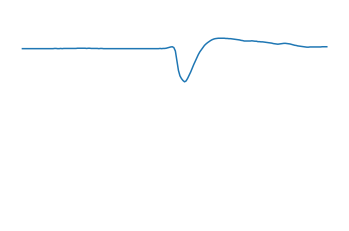

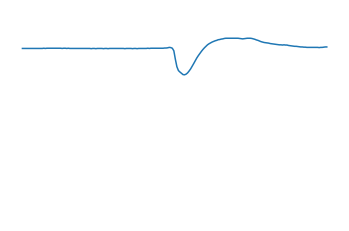

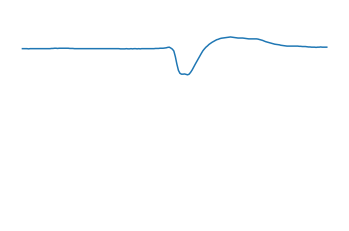

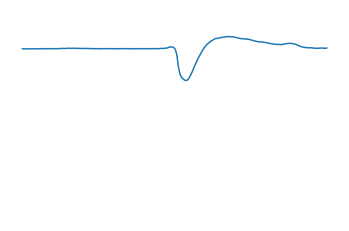

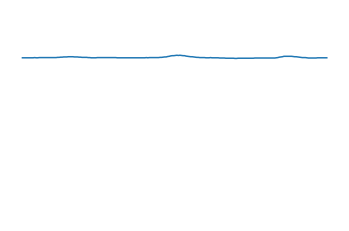

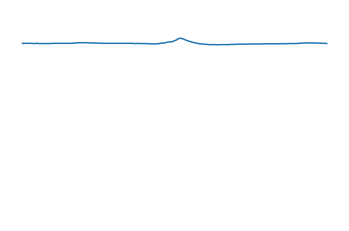

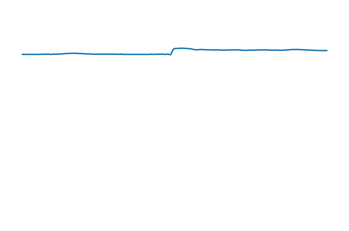

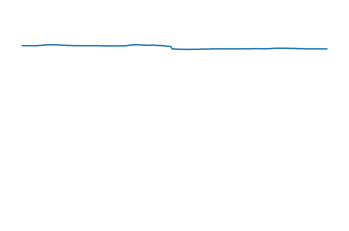

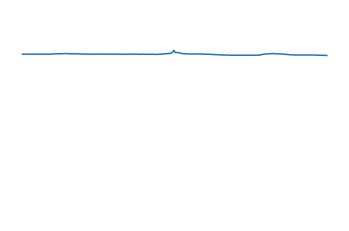

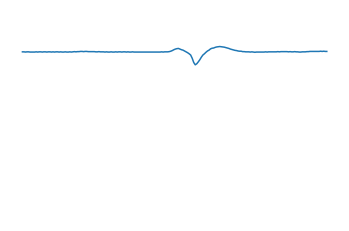

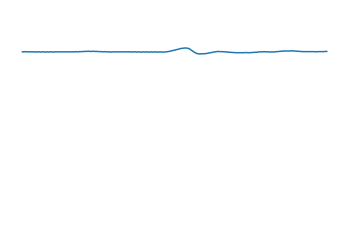

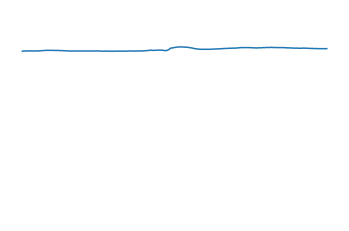

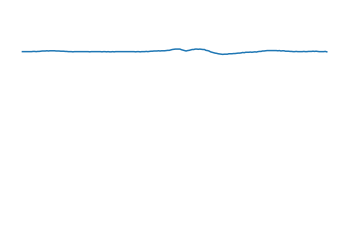

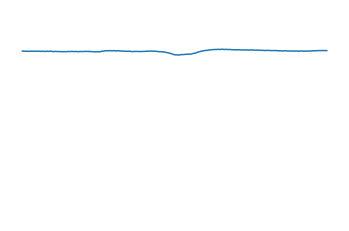

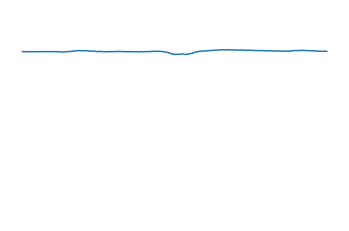

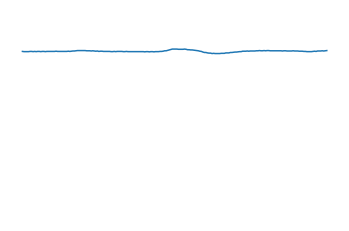

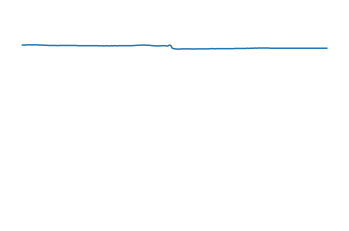

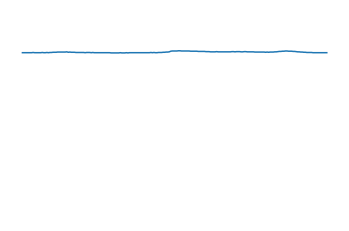

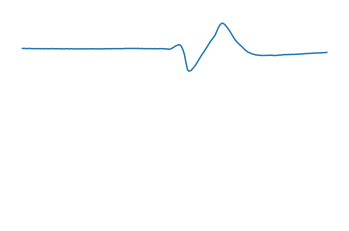

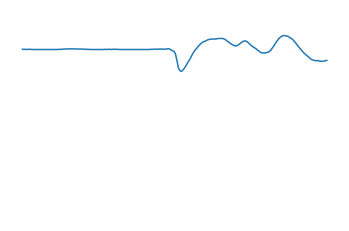

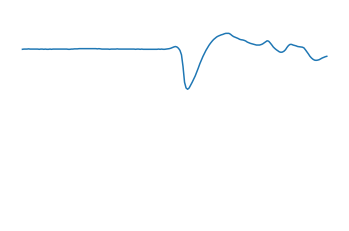

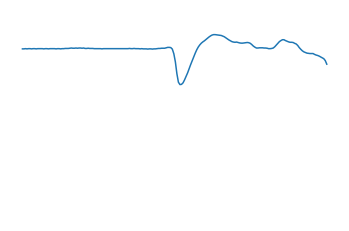

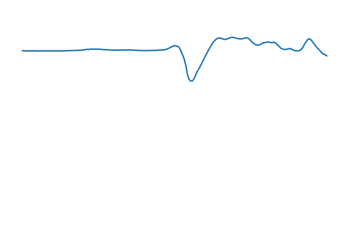

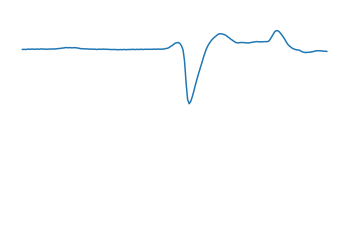

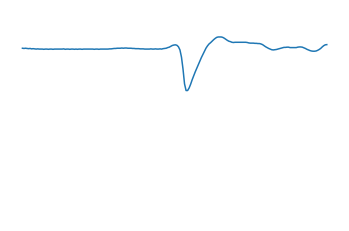

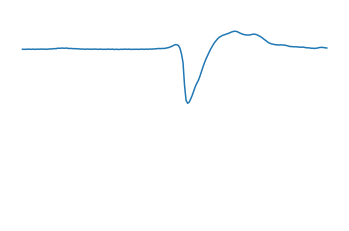

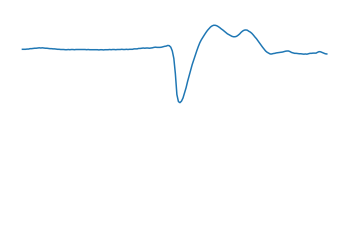

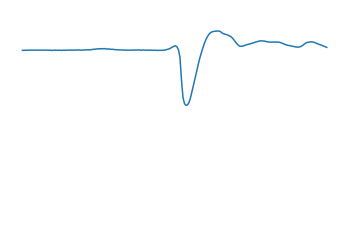

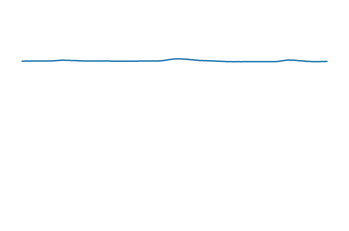

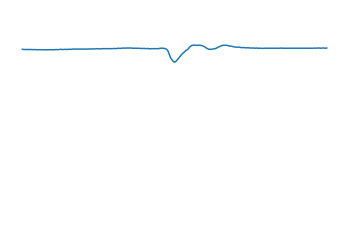

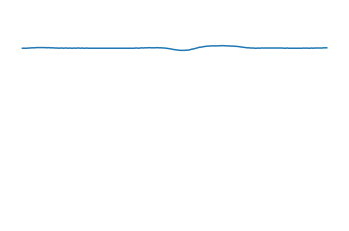

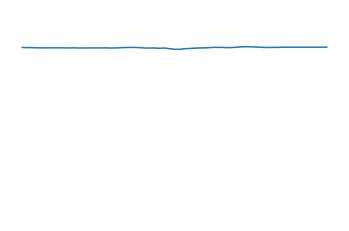

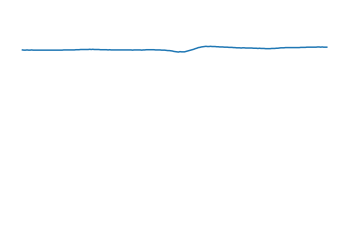

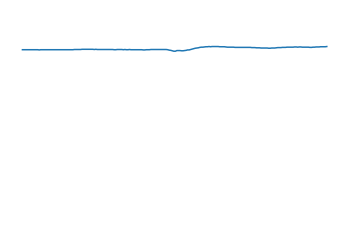

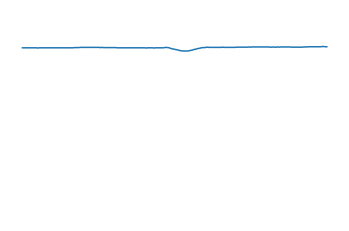

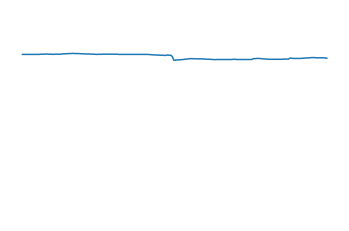

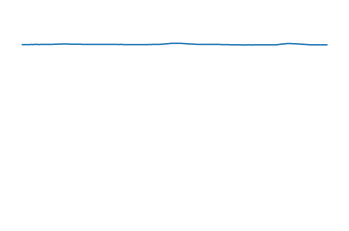

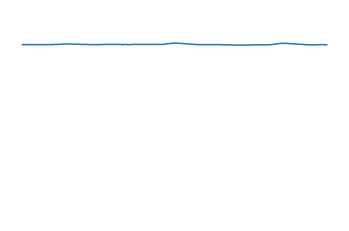

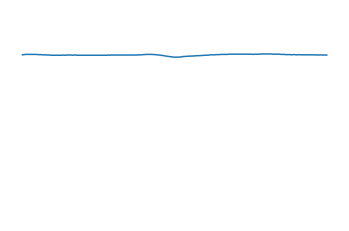

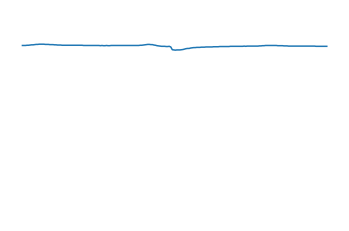

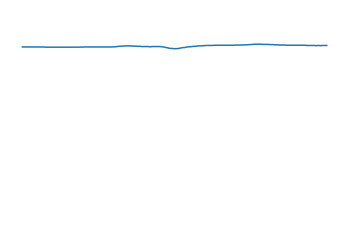

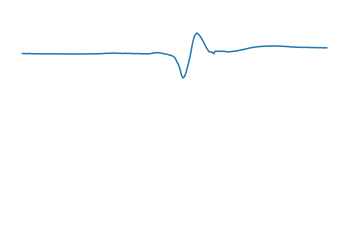

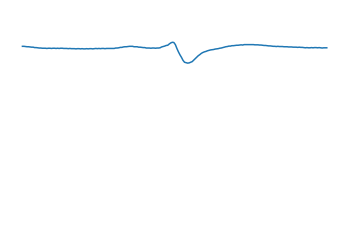

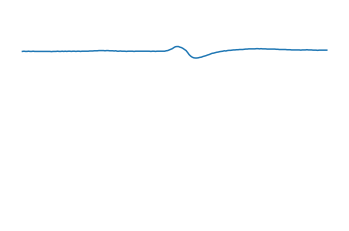

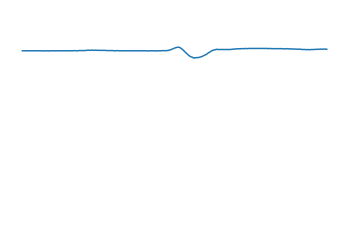

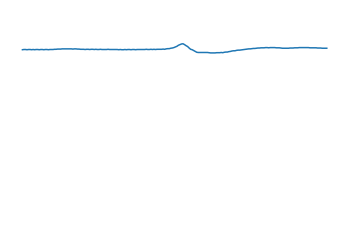

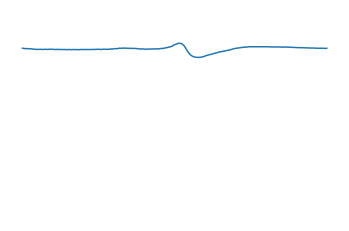

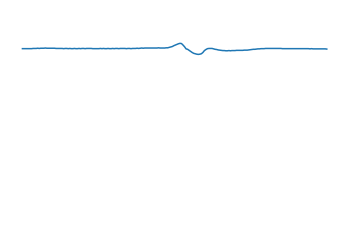

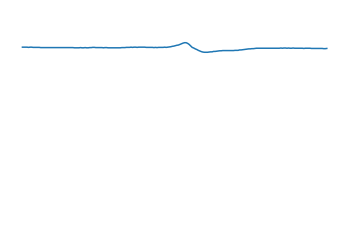

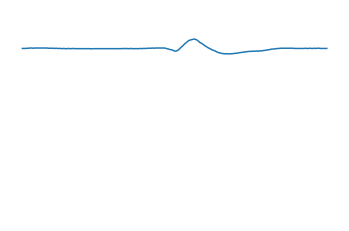

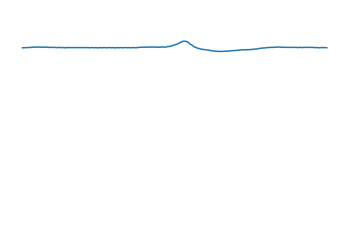

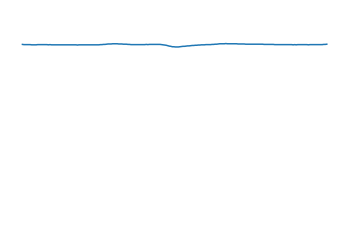

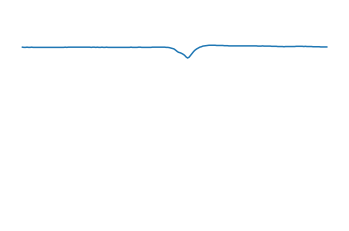

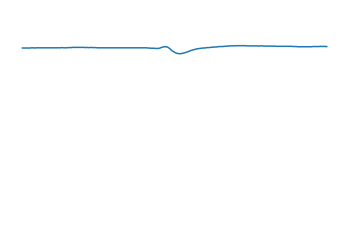

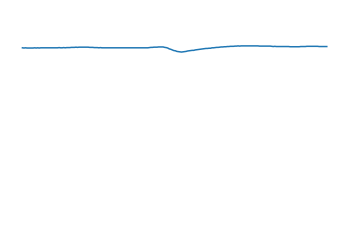

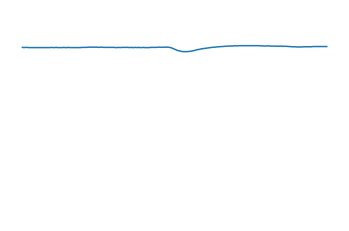

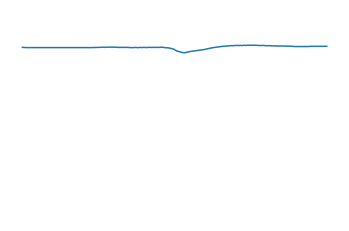

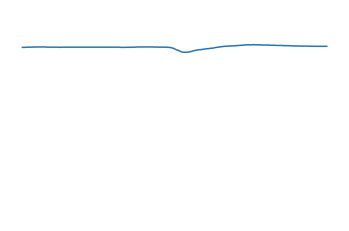

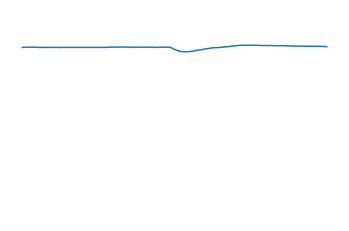

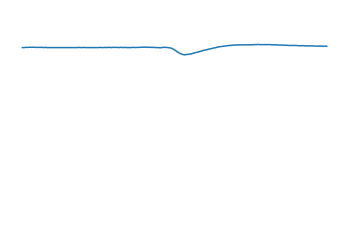

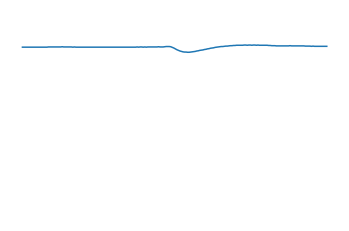

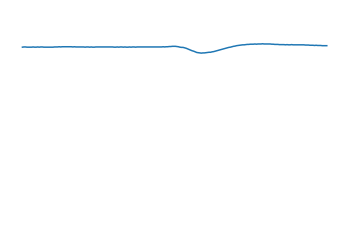

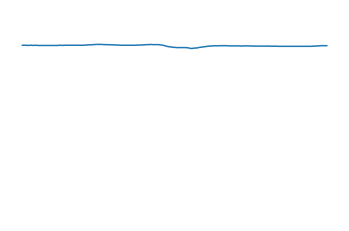

In [10]:
with tf.device('/device:GPU:0'): #GPU使用
    
    def make_all_ppg_array(data,original_data):#120秒分の脈波を取り出し
        time=0
        for line in original_data:

            if time < 12000 :
                data[time] = int(line.split()[3])#何列目とってくるか
                time += 1
                
        return data


    def Anomaly_Detection(ppg,answer,label,data_type):

        data =np.zeros((12000),int)#データ格納用
        det_data = np.zeros((0,det_data_len),int)#検知データ格納用
        sub_det_data = np.zeros((det_data_len),int) #切り出した検知データ格納用
        det_data_num = 0 #データ数を数えるため


        data = make_all_ppg_array(data,ppg)

        #確認のためとりあえず描画
        plt.plot(data, linestyle = "dashed")
        plt.tick_params()
        plt.show()

        cf = changefinder.ChangeFinder(r=0.01, order=1, smooth=7)#変化点検知にChangeFinder使用

        score = np.zeros((12000),int)#異常度格納用
        score_num = 0 #score index
        for i in data:
            sub_score = cf.update(i)
            score[score_num] = sub_score
            score_num += 1

        
        det_time=0 #sub_det_data index
        wait_F = 0 #ジェスチャ終了時の異常度の山を無視するため
        wait_time = 0
        for t in range(0,len(score)):
            if score[t] > 60 and wait_time == 0 and t>2000: #20秒以降で異常度の閾値を60に
                print(f"record:{t}")
                for k in range(t-100,t+100):
                    sub_det_data[det_time] = data[k]
                    det_time += 1
                det_time = 0
                det_data = np.r_[det_data,sub_det_data.reshape(1,-1)] #det_dataに検知したデータを追加
                answer_list.append(answer)
                label_list.append(label)
                wait_time = 1
                if data_type == "train" :
                    det_data_num += 1
            elif wait_time != 0 :
                wait_time += 1
                if wait_time > 500 : #5秒間何もしない
                    wait_time = 0

        print(det_data) #確認用



        # 異常度をプロット
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(score)
        ax2 = ax.twinx()
        ax2.plot(data,'r')
        plt.show()
        
        return det_data,det_data_num
    
    def Data_to_Image(data,data_label,data_num,dir_name):
        fig = plt.figure()
        plt.ylim(0,1023)
        plt.plot(data)
        plt.axis("off")
        fig.savefig(f"{dir_name}{data_label}_{data_num}.png")

    det_data_len = 200 #切り出すデータの長さ
    get_data = np.zeros((0,det_data_len),int)
    train_data_num = 0
    data_num = 0
    answer_list = [] #ジェスチャ名格納用
    label_list = []  #ジェスチャのラベル格納用
    train_label_list = []
    test_label_list = []
    file_gesture = ["gu","choki","par","one","three","four","fox","phone","good","koyubi"]
    
    for i in range(len(file_gesture)):
        for file in glob.glob(f'train_data/{i}*'):
            print(file)
            with open(file) as ppg :
                new_data , data_num = Anomaly_Detection(ppg,file_gesture[i],i,"train")
                get_data = np.r_[get_data,new_data]
                train_data_num += data_num
    
    for i in range(len(file_gesture)):        
        for file in glob.glob(f'test_data/{i}*'):
            print(file)
            with open(file) as ppg :
                new_data , data_num = Anomaly_Detection(ppg,file_gesture[i],i,"test")
                get_data = np.r_[get_data,new_data]
        
    train_label_list = label_list[:train_data_num]
    test_label_list = label_list[train_data_num:]
    
    np_label_list = np.array(label_list,dtype=int)   #numpy配列に変換
    np_train_label_list = np.array(train_label_list,dtype=int)
    np_test_label_list = np.array(test_label_list,dtype=int)
    
    print(answer_list)
    print(get_data)
    print(get_data.shape)
    
    train_data = get_data[:train_data_num]
    test_data = get_data[train_data_num:]
    
    train_dir = "train_img/"
    os.makedirs(train_dir,exist_ok=True)
    for i in range(0,len(train_data)):
        Data_to_Image(train_data[i],train_label_list[i],i,train_dir)
        
    test_dir = "test_img/"
    os.makedirs(test_dir,exist_ok=True)
    for i in range(0,len(test_data)):
        Data_to_Image(test_data[i],test_label_list[i],i,test_dir)
    
    